In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_excel("Customer_Churn_Data.xlsx",sheet_name="Data for DSBA")
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [5]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [6]:
df.describe(include='all').T

count unique         top  freq      mean       std  \
AccountID                11260    NaN         NaN   NaN   25629.5   3250.63   
Churn                    11260    NaN         NaN   NaN  0.168384  0.374223   
Tenure                   11158     38           1  1351       NaN       NaN   
City_Tier                11148    NaN         NaN   NaN   1.65393  0.915015   
CC_Contacted_LY          11158    NaN         NaN   NaN   17.8671   8.85327   
Payment                  11151      5  Debit Card  4587       NaN       NaN   
Gender                   11152      4        Male  6328       NaN       NaN   
Service_Score            11162    NaN         NaN   NaN   2.90253  0.725584   
Account_user_count       11148      7           4  4569       NaN       NaN   
account_segment          11163      7       Super  4062       NaN       NaN   
CC_Agent_Score           11144    NaN         NaN   NaN   3.06649   1.37977   
Marital_Status           11048      3     Married  5860       NaN       NaN   
rev_per_month            11158     59           3  1746       NaN       NaN   
Complain_ly              10903    NaN         NaN   NaN  0.285334  0.451594   
rev_growth_yoy           11260     20          14  1524       NaN       NaN   
coupon_used_for_payment  11260     20           1  4373       NaN       NaN   
Day_Since_CC_connect     10903     24           3  1816       NaN       NaN   
cashback                 10789   5693      155.62    10       NaN       NaN   
Login_device             11039      3      Mobile  7482       NaN       NaN   

                           min      25%      50%      75%    max  
AccountID                20000  22814.8  25629.5  28444.2  31259  
Churn                        0        0        0        0      1  
Tenure                     NaN      NaN      NaN      NaN    NaN  
City_Tier                    1        1        1        3      3  
CC_Contacted_LY              4       11       16       23    132  
Payment                    NaN      NaN      NaN      NaN    NaN  
Gender                     NaN      NaN      NaN      NaN    NaN  
Service_Score                0        2        3        3      5  
Account_user_count         NaN      NaN      NaN      NaN    NaN  
account_segment            NaN      NaN      NaN      NaN    NaN  
CC_Agent_Score               1        2        3        4      5  
Marital_Status             NaN      NaN      NaN      NaN    NaN  
rev_per_month              NaN      NaN      NaN      NaN    NaN  
Complain_ly                  0        0        0        1      1  
rev_growth_yoy             NaN      NaN      NaN      NaN    NaN  
coupon_used_for_payment    NaN      NaN      NaN      NaN    NaN  
Day_Since_CC_connect       NaN      NaN      NaN      NaN    NaN  
cashback                   NaN      NaN      NaN      NaN    NaN  
Login_device               NaN      NaN      NaN      NaN    NaN

In [7]:
df.size

213940

In [8]:
df.shape

(11260, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
AccountID                  11260 non-null int64
Churn                      11260 non-null int64
Tenure                     11158 non-null object
City_Tier                  11148 non-null float64
CC_Contacted_LY            11158 non-null float64
Payment                    11151 non-null object
Gender                     11152 non-null object
Service_Score              11162 non-null float64
Account_user_count         11148 non-null object
account_segment            11163 non-null object
CC_Agent_Score             11144 non-null float64
Marital_Status             11048 non-null object
rev_per_month              11158 non-null object
Complain_ly                10903 non-null float64
rev_growth_yoy             11260 non-null object
coupon_used_for_payment    11260 non-null object
Day_Since_CC_connect       10903 non-null object
cashback                   10789 non-null object
Login_

# Some cleaning on Tenure and Account_user_count


In [10]:
df['Tenure'].replace('#',3, inplace=True)

In [11]:
df['Account_user_count'].replace('@',2, inplace=True)

In [12]:
df['Gender'].replace('F','Female', inplace=True)

In [13]:
df['Gender'].replace('M','Male', inplace=True)

In [14]:
df['account_segment'].replace('Regular Plus','Regular +', inplace=True)

In [15]:
df['account_segment'].replace('Super Plus','Super +', inplace=True)

In [16]:
df['account_segment'].unique()

array(['Super', 'Regular +', 'Regular', 'HNI', nan, 'Super +'],
      dtype=object)

In [17]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [18]:
df['Login_device'].replace('&&&&',np.nan, inplace=True)

In [19]:
df['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [20]:
df['rev_growth_yoy'].replace('$',4, inplace=True)

In [21]:
df['coupon_used_for_payment'].replace('#',3, inplace=True)

In [22]:
df['coupon_used_for_payment'].replace('$',4, inplace=True)

In [23]:
df['coupon_used_for_payment'].replace('*',8, inplace=True)

In [24]:
df['Day_Since_CC_connect'].replace('$',4, inplace=True)

In [25]:
df['cashback'].replace('$',4, inplace=True)

In [26]:
df['Account_user_count'].replace('@',2, inplace=True)

In [27]:
df['rev_per_month'].replace('+',np.nan, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
AccountID                  11260 non-null int64
Churn                      11260 non-null int64
Tenure                     11158 non-null float64
City_Tier                  11148 non-null float64
CC_Contacted_LY            11158 non-null float64
Payment                    11151 non-null object
Gender                     11152 non-null object
Service_Score              11162 non-null float64
Account_user_count         11148 non-null float64
account_segment            11163 non-null object
CC_Agent_Score             11144 non-null float64
Marital_Status             11048 non-null object
rev_per_month              10469 non-null float64
Complain_ly                10903 non-null float64
rev_growth_yoy             11260 non-null int64
coupon_used_for_payment    11260 non-null int64
Day_Since_CC_connect       10903 non-null float64
cashback                   10789 non-null float64
Log

## Convert datatypes by below mentioned highlight

Churn                      object

Tenure                     int

City_Tier                  cate/obj

CC_Contacted_LY            float64

Payment                    object

Gender                     object

Service_Score              cat/obj

Account_user_count         cat/obj

account_segment            object

CC_Agent_Score             cat/obj

Marital_Status             object

rev_per_month              int

Complain_ly                cat/obj

rev_growth_yoy             float
coupon_used_for_payment    float
Day_Since_CC_connect       float
cashback                   float

Login_device               object

# Check for duplicates

In [29]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AccountID, Churn, Tenure, City_Tier, CC_Contacted_LY, Payment, Gender, Service_Score, Account_user_count, account_segment, CC_Agent_Score, Marital_Status, rev_per_month, Complain_ly, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, Login_device]
Index: []

# Check for Null

In [30]:
np.any(pd.isna(df))

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

In [31]:
df.isnull().sum()


AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               760
dtype: int64

In [32]:
df.isnull().sum().sum()


3904

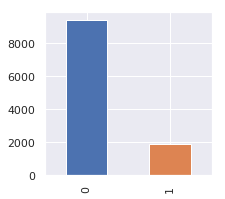

In [33]:
df['Churn'].value_counts().plot(kind='bar',figsize=(3,3))


In [34]:
df['Churn'].describe().T

count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64

In [35]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [36]:
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [37]:
df['Churn'] = pd.Categorical(df['Churn']).codes

# Data Type Change

convert_dict = {

'Churn':object,
'Tenure'     :float ,
'City_Tier'     :object,
'CC_Contacted_LY'     :float ,
'Payment'     :object,
'Gender'     :object,
'Service_Score'     :object,
'Account_user_count'     :object,
'account_segment'     :object,
'CC_Agent_Score'     :object,
'Marital_Status'     :object,
'rev_per_month'     :float ,
'Complain_ly'     :object,
'rev_growth_yoy'     :float ,
'coupon_used_for_payment'     :float ,
'Day_Since_CC_connect'     :float ,
'cashback'     :float ,
'Login_device'     :object
}

df = df.astype(convert_dict)
print(df.dtypes)

# MISSING VALUES IMPUTATION

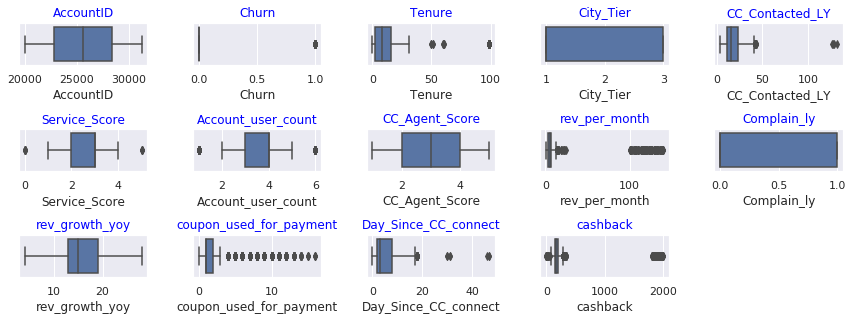

In [38]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

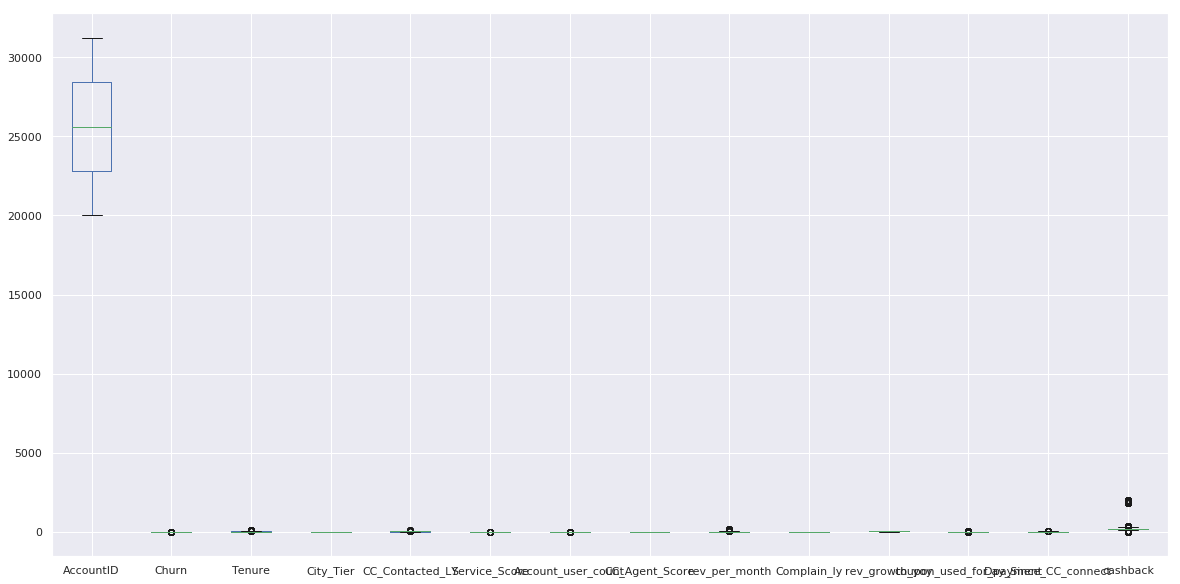

In [39]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
AccountID                  11260 non-null int64
Churn                      11260 non-null int8
Tenure                     11158 non-null float64
City_Tier                  11148 non-null float64
CC_Contacted_LY            11158 non-null float64
Payment                    11151 non-null object
Gender                     11152 non-null object
Service_Score              11162 non-null float64
Account_user_count         11148 non-null float64
account_segment            11163 non-null object
CC_Agent_Score             11144 non-null float64
Marital_Status             11048 non-null object
rev_per_month              10469 non-null float64
Complain_ly                10903 non-null float64
rev_growth_yoy             11260 non-null int64
coupon_used_for_payment    11260 non-null int64
Day_Since_CC_connect       10903 non-null float64
cashback                   10789 non-null float64
Logi

In [41]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular       520
Super +       818
HNI          1639
Super        4062
Regular +    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      7482
Name: Login_device, dtype: int64




In [42]:
df.skew(axis = 0, skipna = True)

AccountID                  0.000000
Churn                      1.772606
Tenure                     3.909479
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.335923
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.742938
coupon_used_for_payment    2.573199
Day_Since_CC_connect       1.273121
cashback                   8.769123
dtype: float64

In [43]:
df=df.drop(['AccountID'], axis=1)

In [44]:
print("the no of rows ",df.shape[0]," ", "the no of colums ",df.shape[1])


the no of rows  11260   the no of colums  18


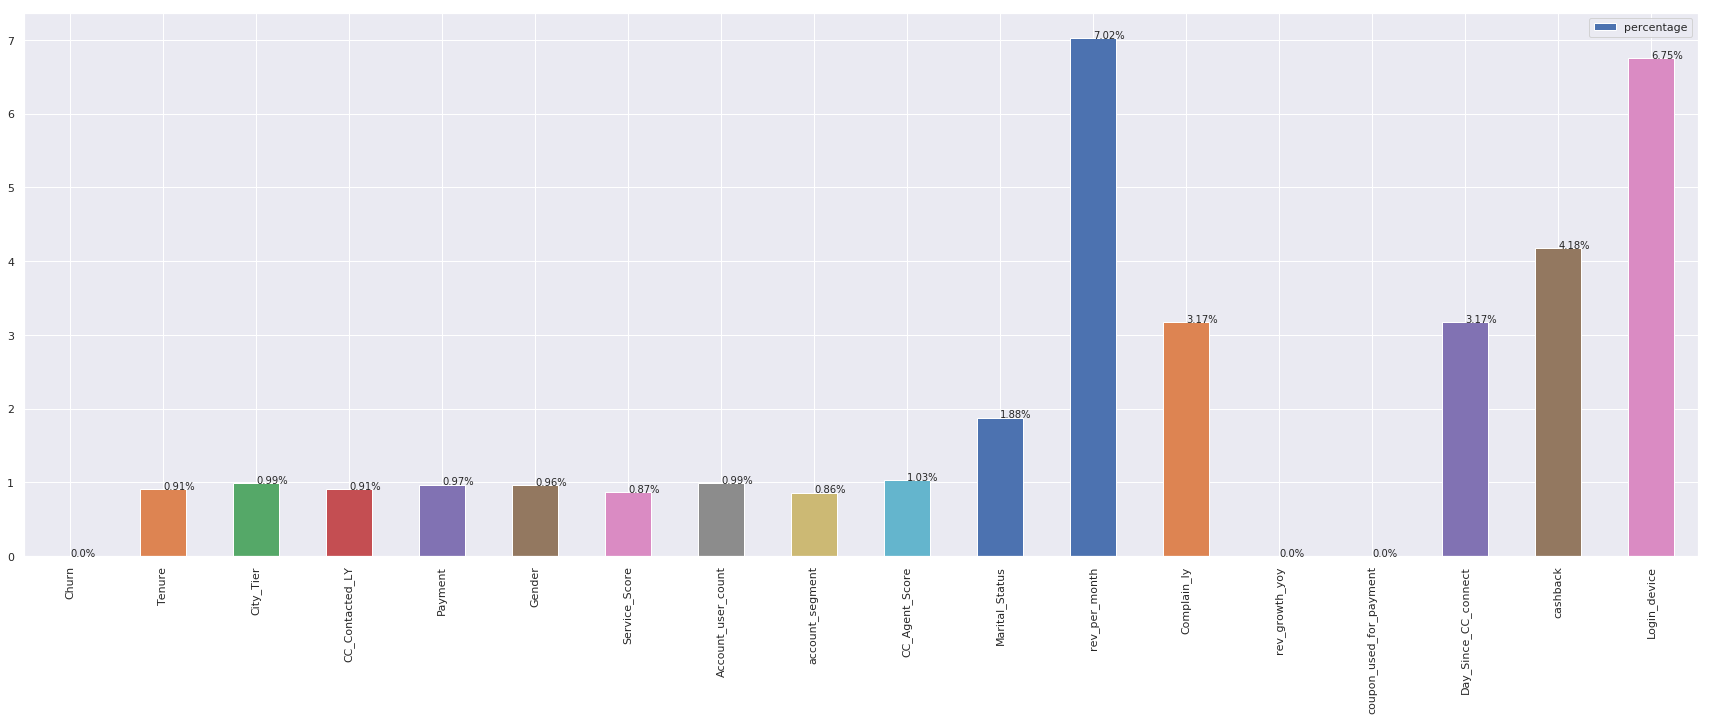

In [45]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [46]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [47]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Payment : 0
Gender : 0
account_segment : 0
Marital_Status : 0
Login_device : 0


In [48]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()     

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [49]:
df.Payment.isnull().sum()

109

for column in df.columns:
    if df[column].dtype == 'object':
        mode = df[column].mode()
        df[column] = df[column].fillna(mode.iloc[0])    
        
df.isnull().sum()     

In [50]:
df['Tenure'] = df['Tenure'].fillna("No_info")
df['Payment'] = df['Payment'].fillna("No_info")
df['Gender'] = df['Gender'].fillna("No_info")
df['Account_user_count'] = df['Account_user_count'].fillna("No_info")
df['account_segment'] = df['account_segment'].fillna("No_info")
df['Marital_Status'] = df['Marital_Status'].fillna("No_info")
df['rev_per_month'] = df['rev_per_month'].fillna("No_info")
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna("No_info")
df['cashback'] = df['cashback'].fillna("No_info")
df['Login_device'] = df['Login_device'].fillna("No_info")

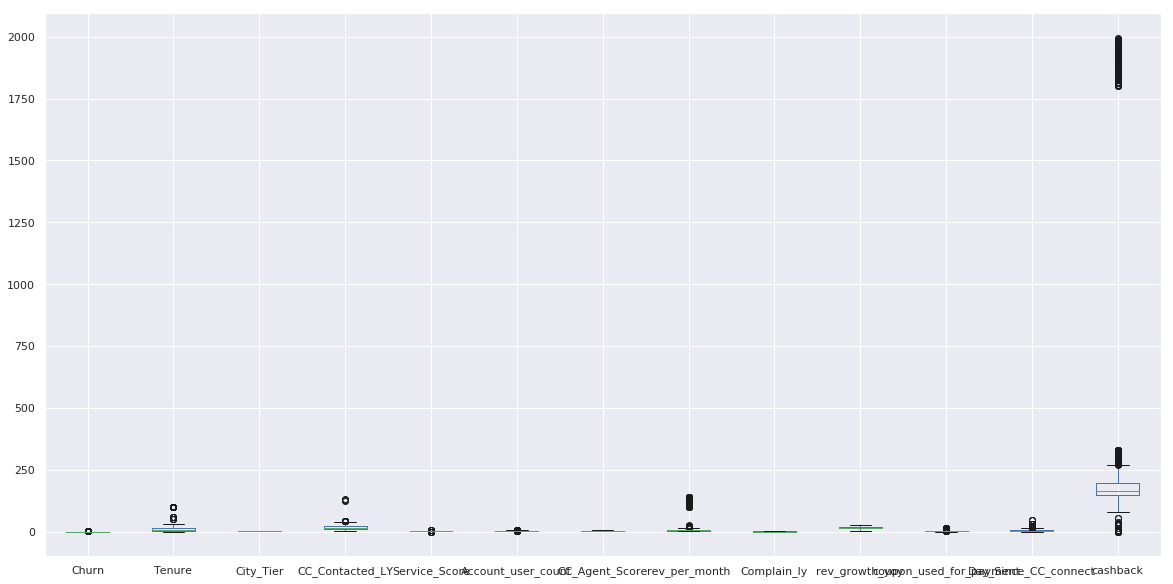

In [51]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

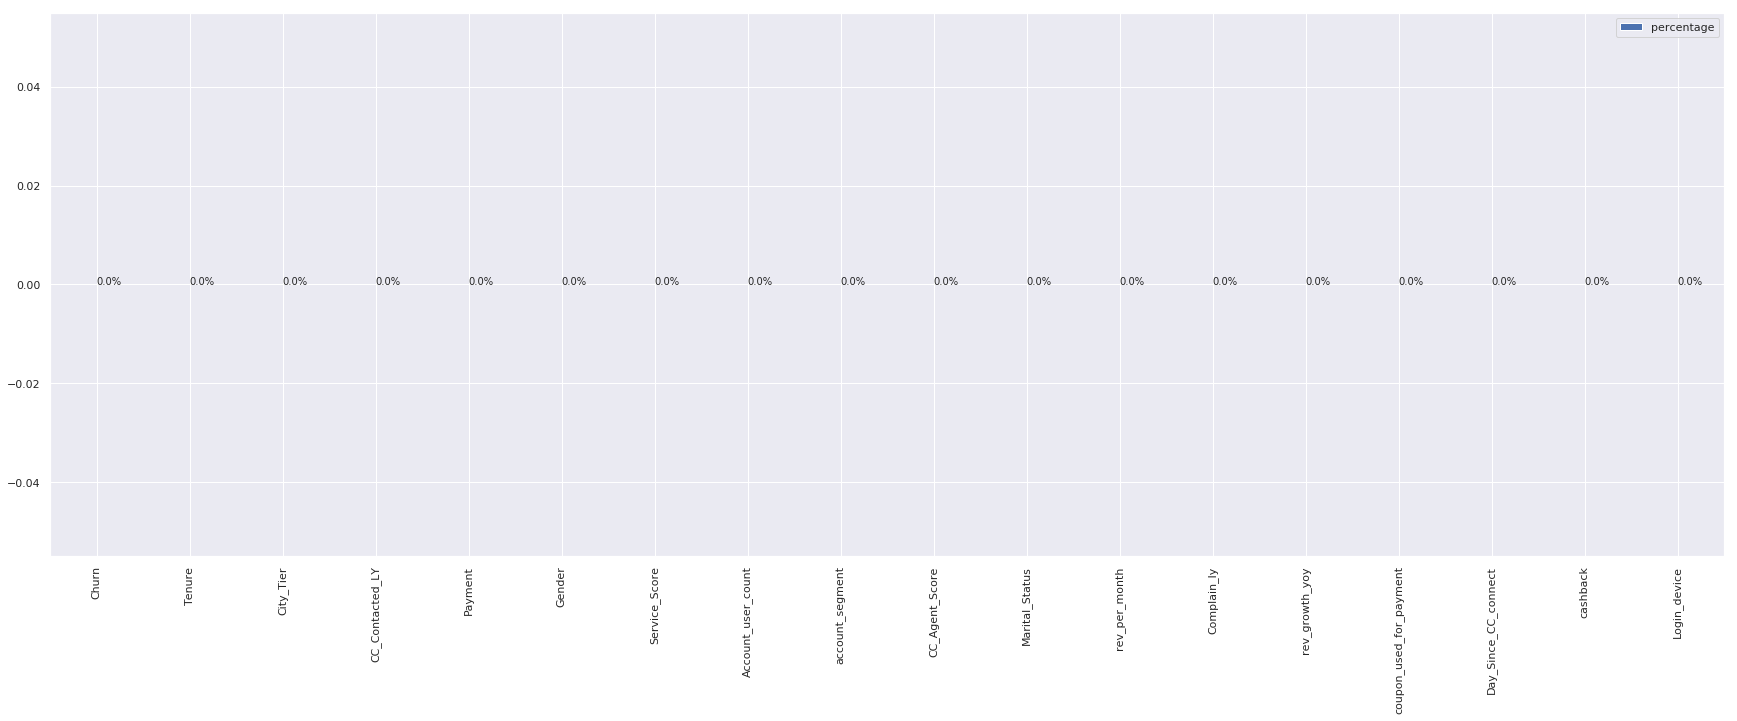

In [52]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

# OUTLIER TREATMENT

In [53]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

In [54]:
lstnumericcolumns=[ 'CC_Contacted_LY','Service_Score']

In [55]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [56]:
for column in df[lstnumericcolumns].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])


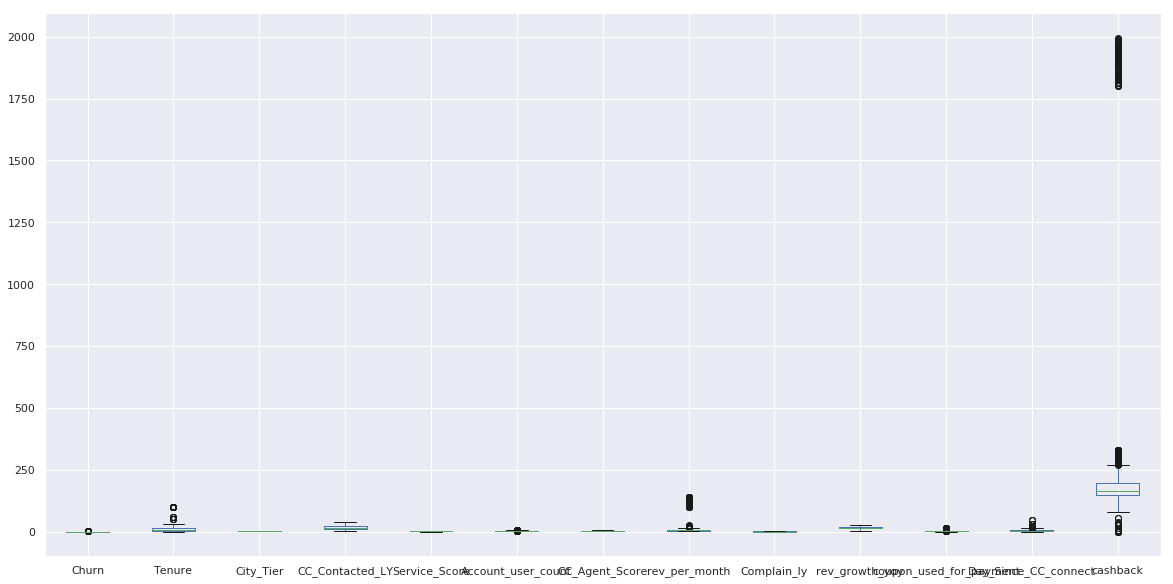

In [57]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

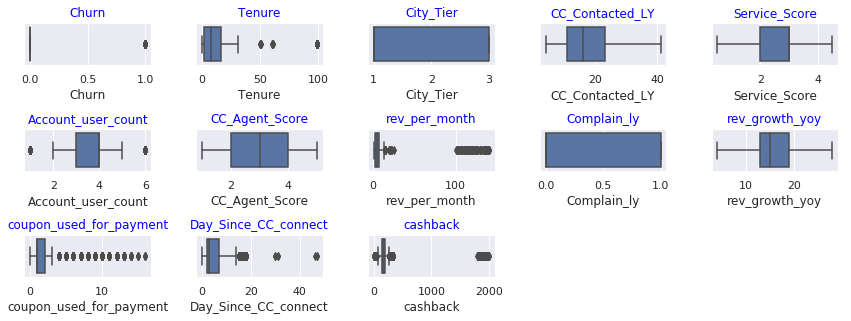

In [58]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

# GROUPING CATEGORICAL

In [59]:
convert_dict = {

'Churn':object,
'Tenure'     :float ,
'City_Tier'     :object,
'CC_Contacted_LY'     :float ,
'Payment'     :object,
'Gender'     :object,
'Service_Score'     :object,
'Account_user_count'     :object,
'account_segment'     :object,
'CC_Agent_Score'     :object,
'Marital_Status'     :object,
'rev_per_month'     :float ,
'Complain_ly'     :object,
'rev_growth_yoy'     :float ,
'coupon_used_for_payment'     :float ,
'Day_Since_CC_connect'     :float ,
'cashback'     :float ,
'Login_device'     :object
}

In [60]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  6
No_info              109
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  3
No_info     108
Female     4448
Male       6704
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  6
No_info        97
Regular       520
Super +       818
HNI          1639
Super        4062
Regular +    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  4
No_info      212
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  3
No_info      760
Computer    3018
Mobile      7482
Name: Login_device, dtype: int64




In [61]:
df['Churn'] = pd.Categorical(df['Churn']).codes

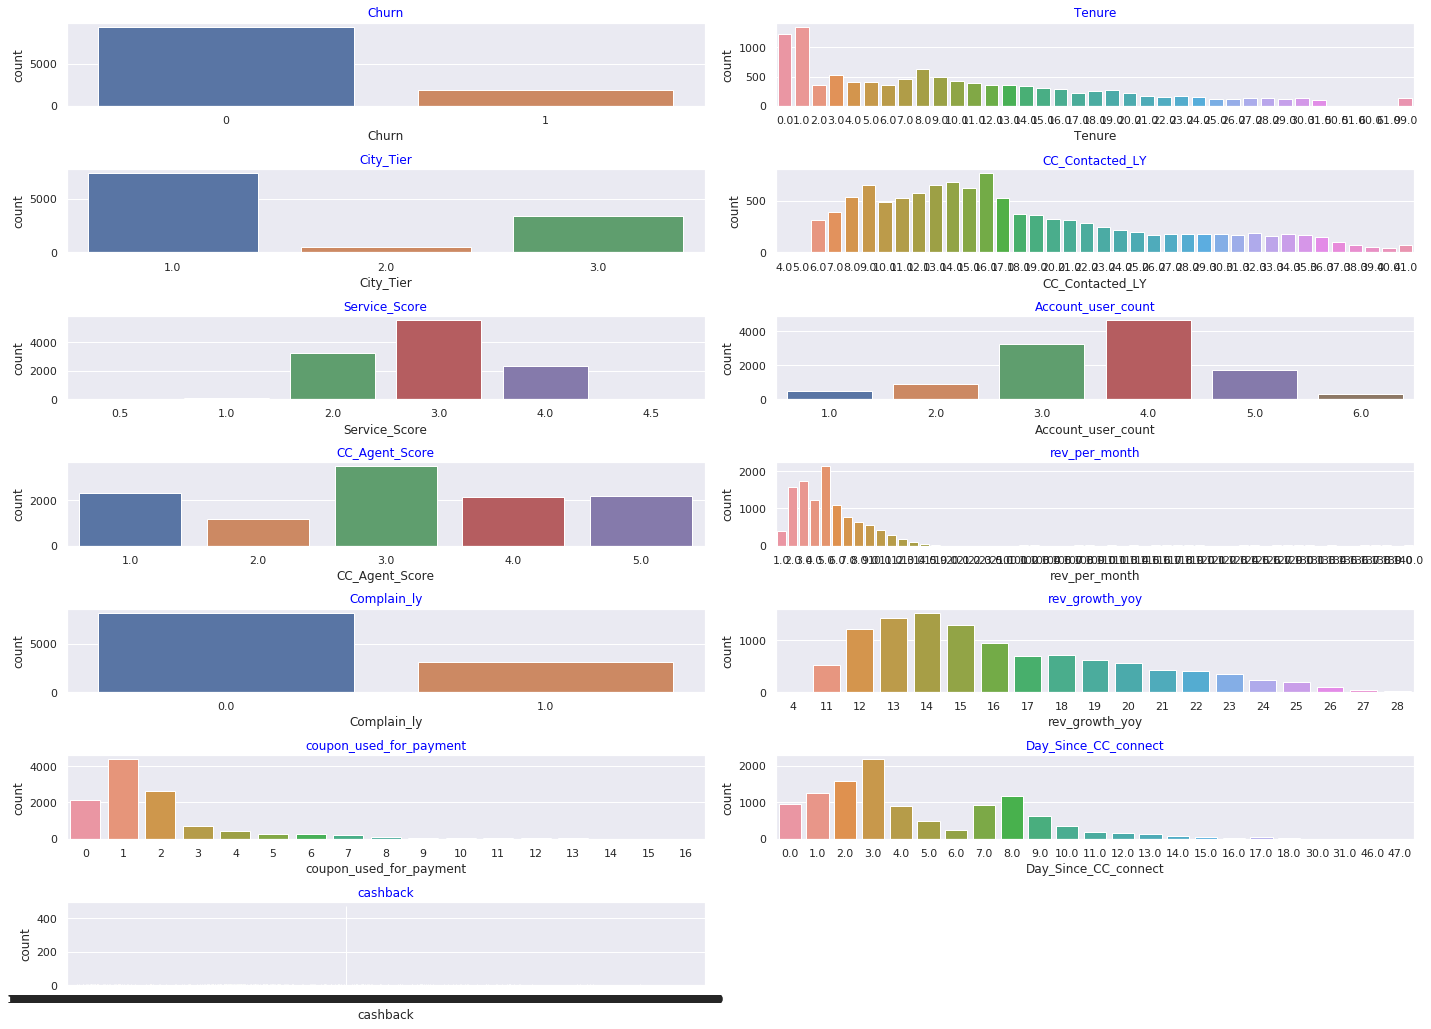

In [62]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

plt.tight_layout()

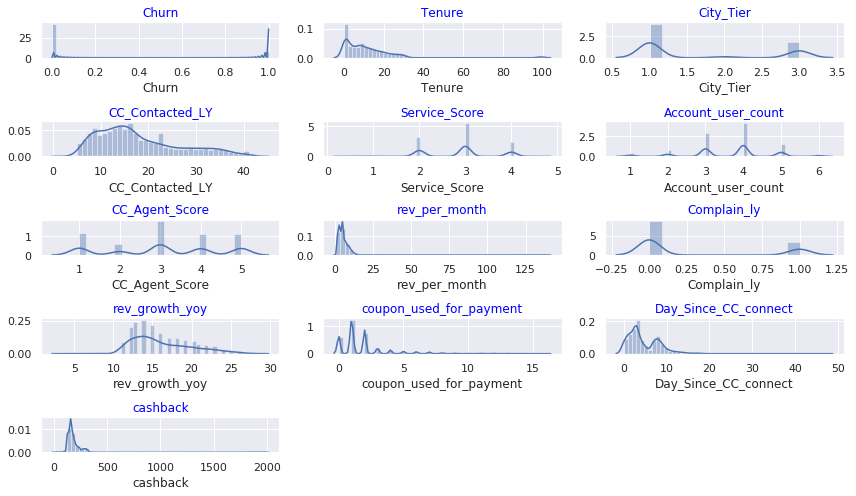

In [63]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.distplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

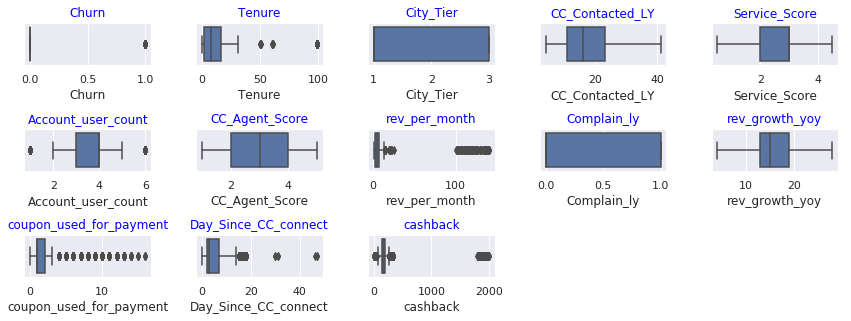

In [64]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(5,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

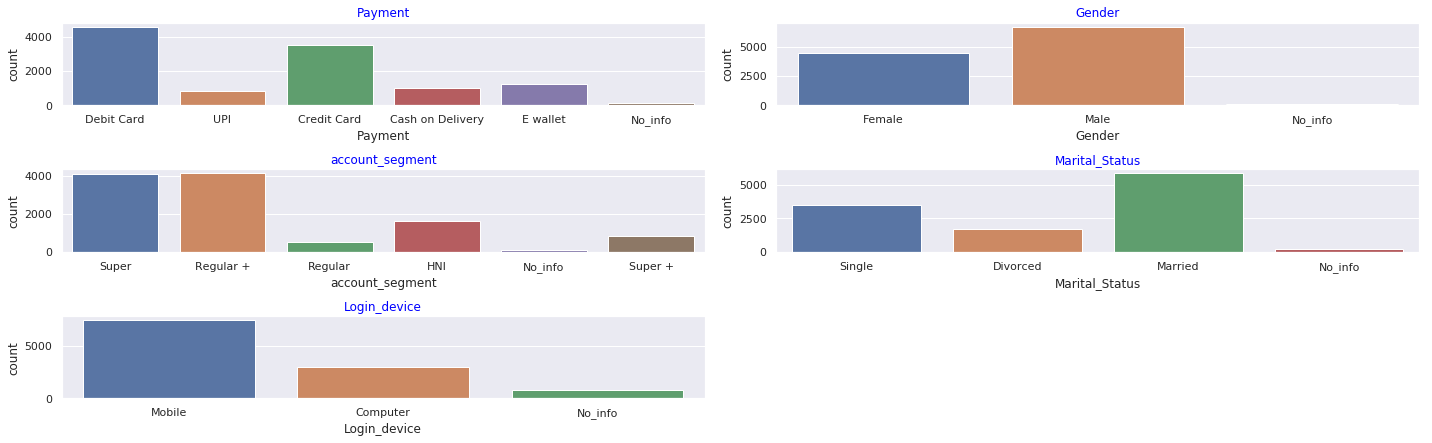

In [65]:
data_plot=df[df.dtypes[df.dtypes=='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

plt.tight_layout()

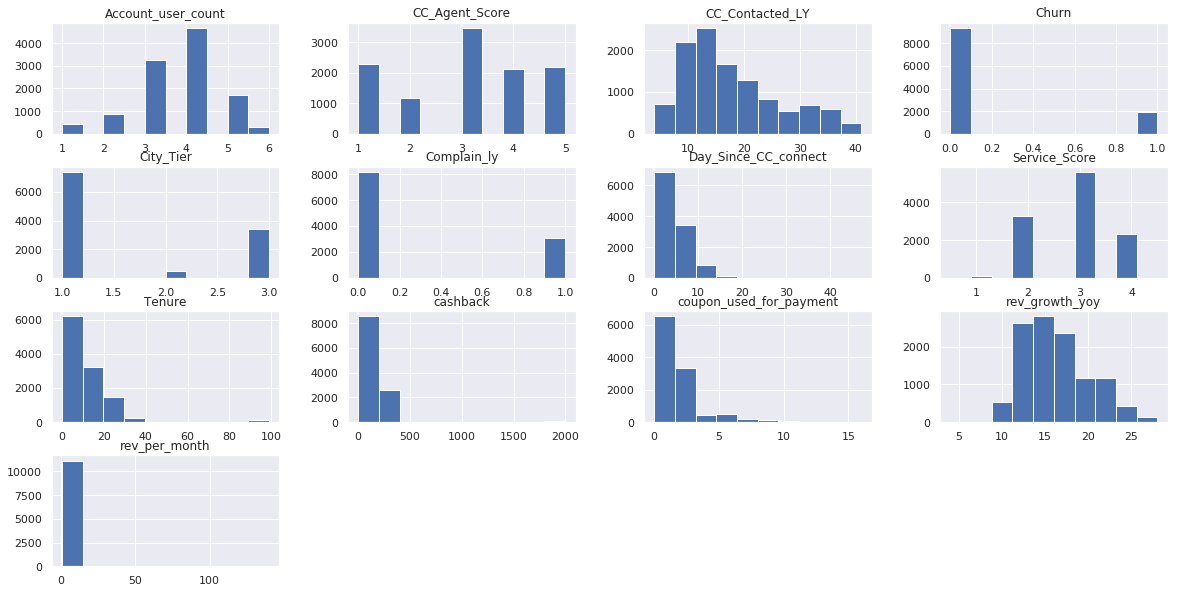

In [66]:
df.hist(bins=10, figsize=(20,10))
plt.show()

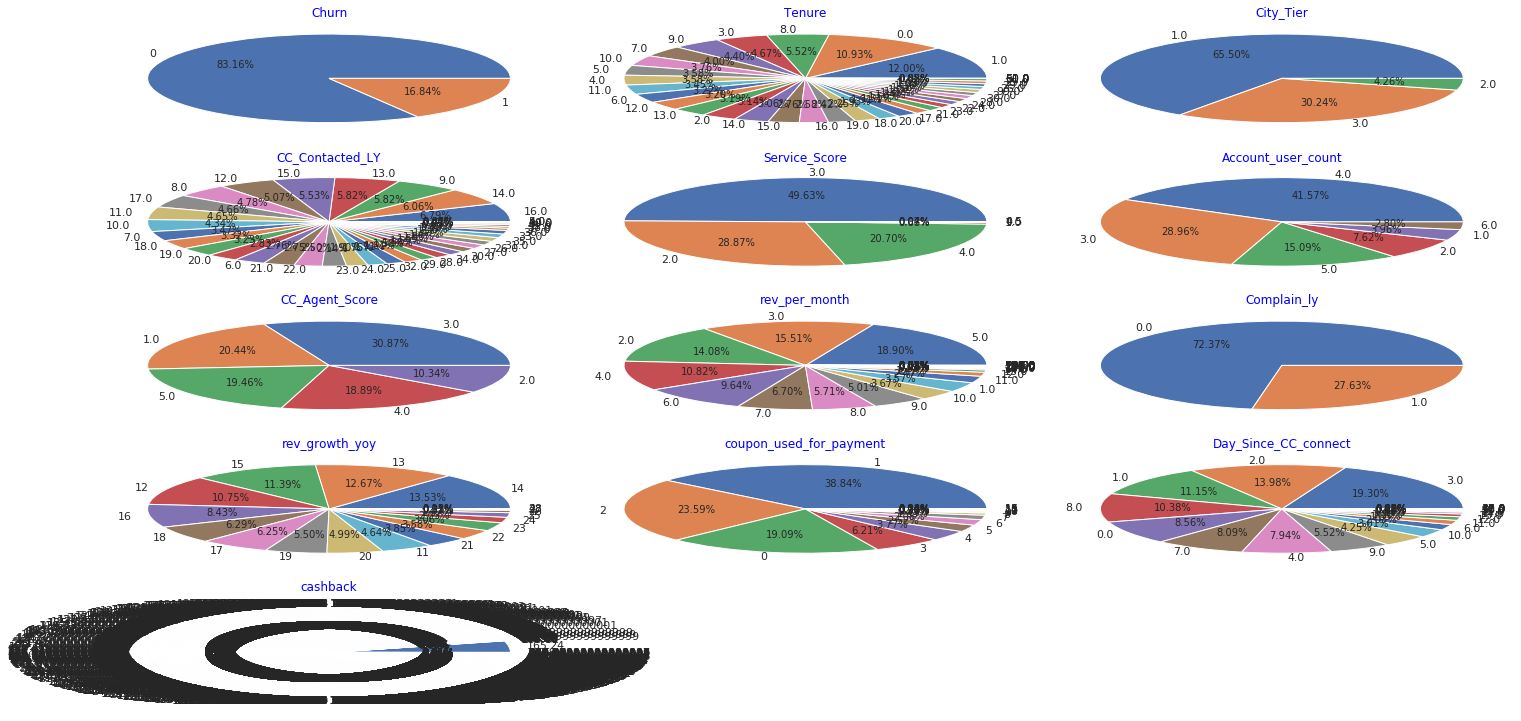

In [67]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(10,3,i+1)
    plt.pie(x = data_plot[data_plot.columns[i]].value_counts(),labels =data_plot[data_plot.columns[i]].value_counts().index,autopct = '%1.2f%%')
    ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

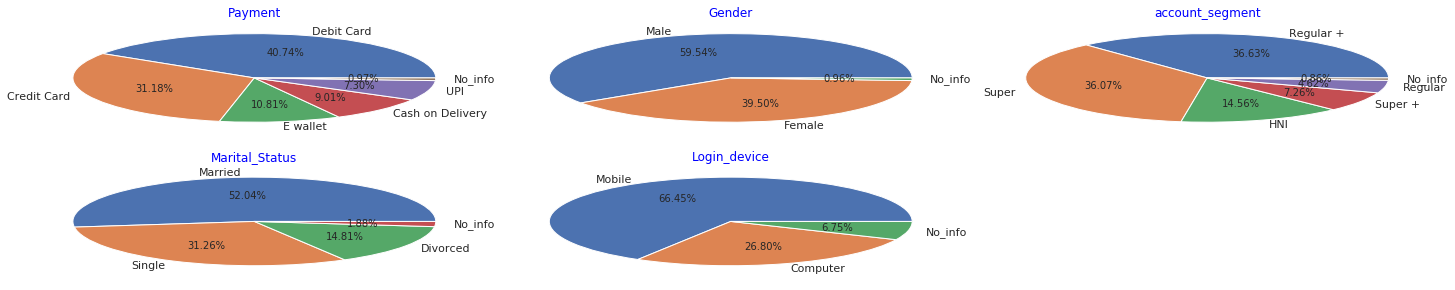

In [68]:
data_plot=df[df.dtypes[df.dtypes=='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(10,3,i+1)
    plt.pie(x = data_plot[data_plot.columns[i]].value_counts(),labels =data_plot[data_plot.columns[i]].value_counts().index,autopct = '%1.2f%%')
    ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

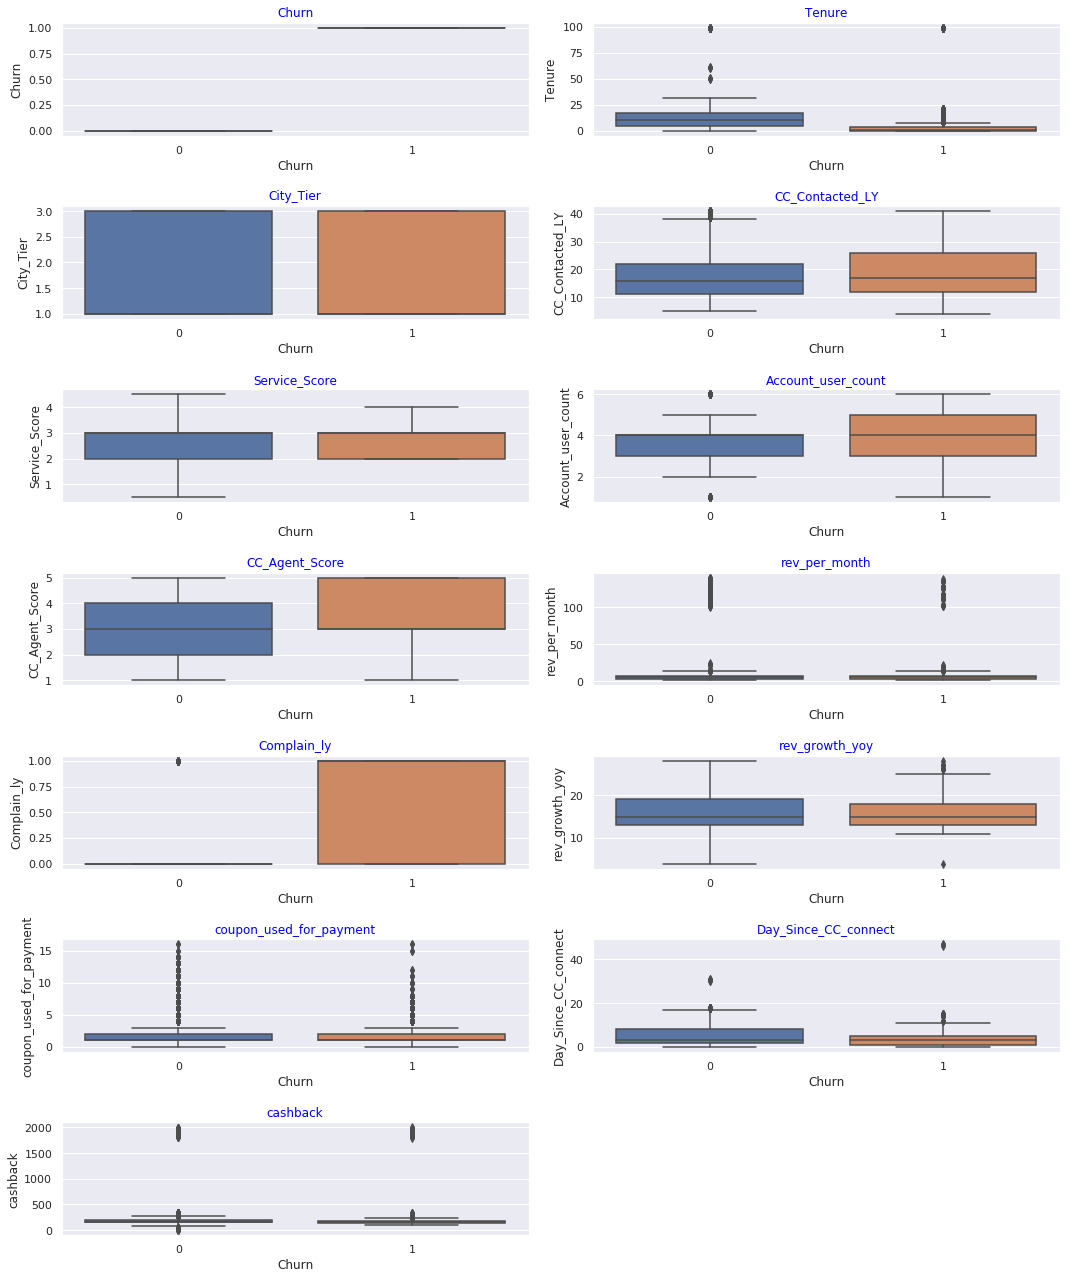

In [69]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(15,25))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.boxplot(data_plot["Churn"], data_plot[data_plot.columns[i]]) 
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

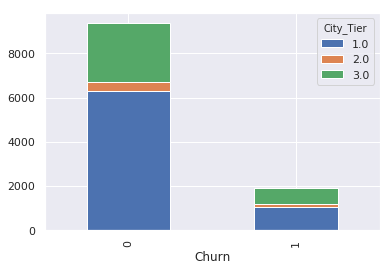

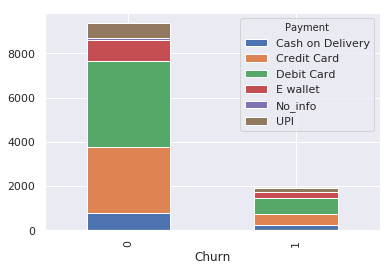

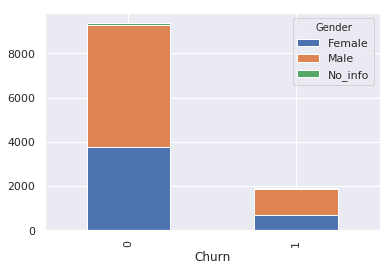

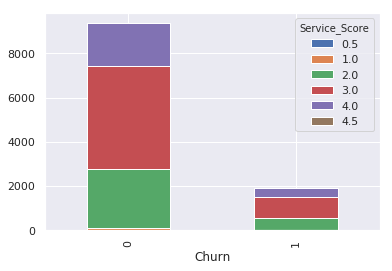

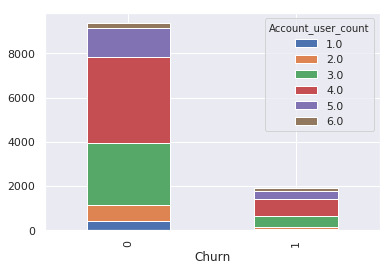

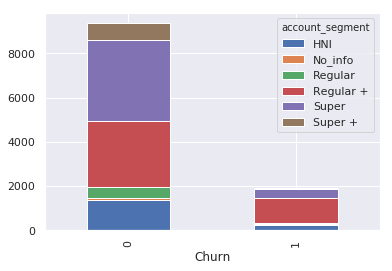

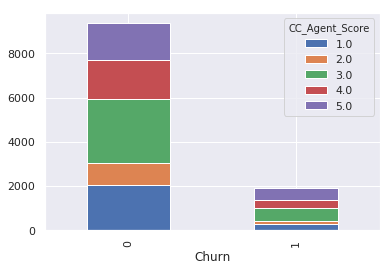

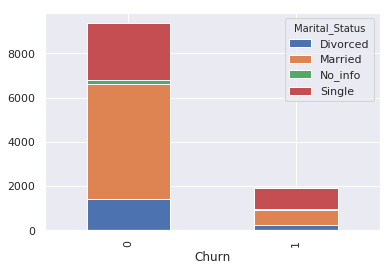

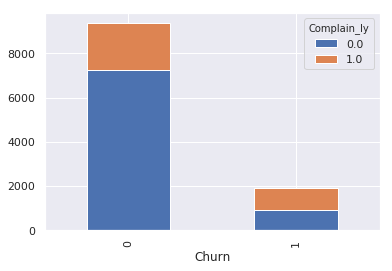

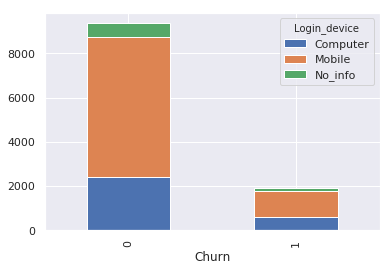

In [70]:
       
pd.crosstab(df['Churn'], df['City_Tier']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Payment']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Gender']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Service_Score']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Account_user_count']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['account_segment']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['CC_Agent_Score']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Marital_Status']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Complain_ly']).plot(kind='bar', stacked=True)
pd.crosstab(df['Churn'], df['Login_device']).plot(kind='bar', stacked=True)


/etl/LVS/dmetldata11/scaas/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/etl/LVS/dmetldata11/scaas/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


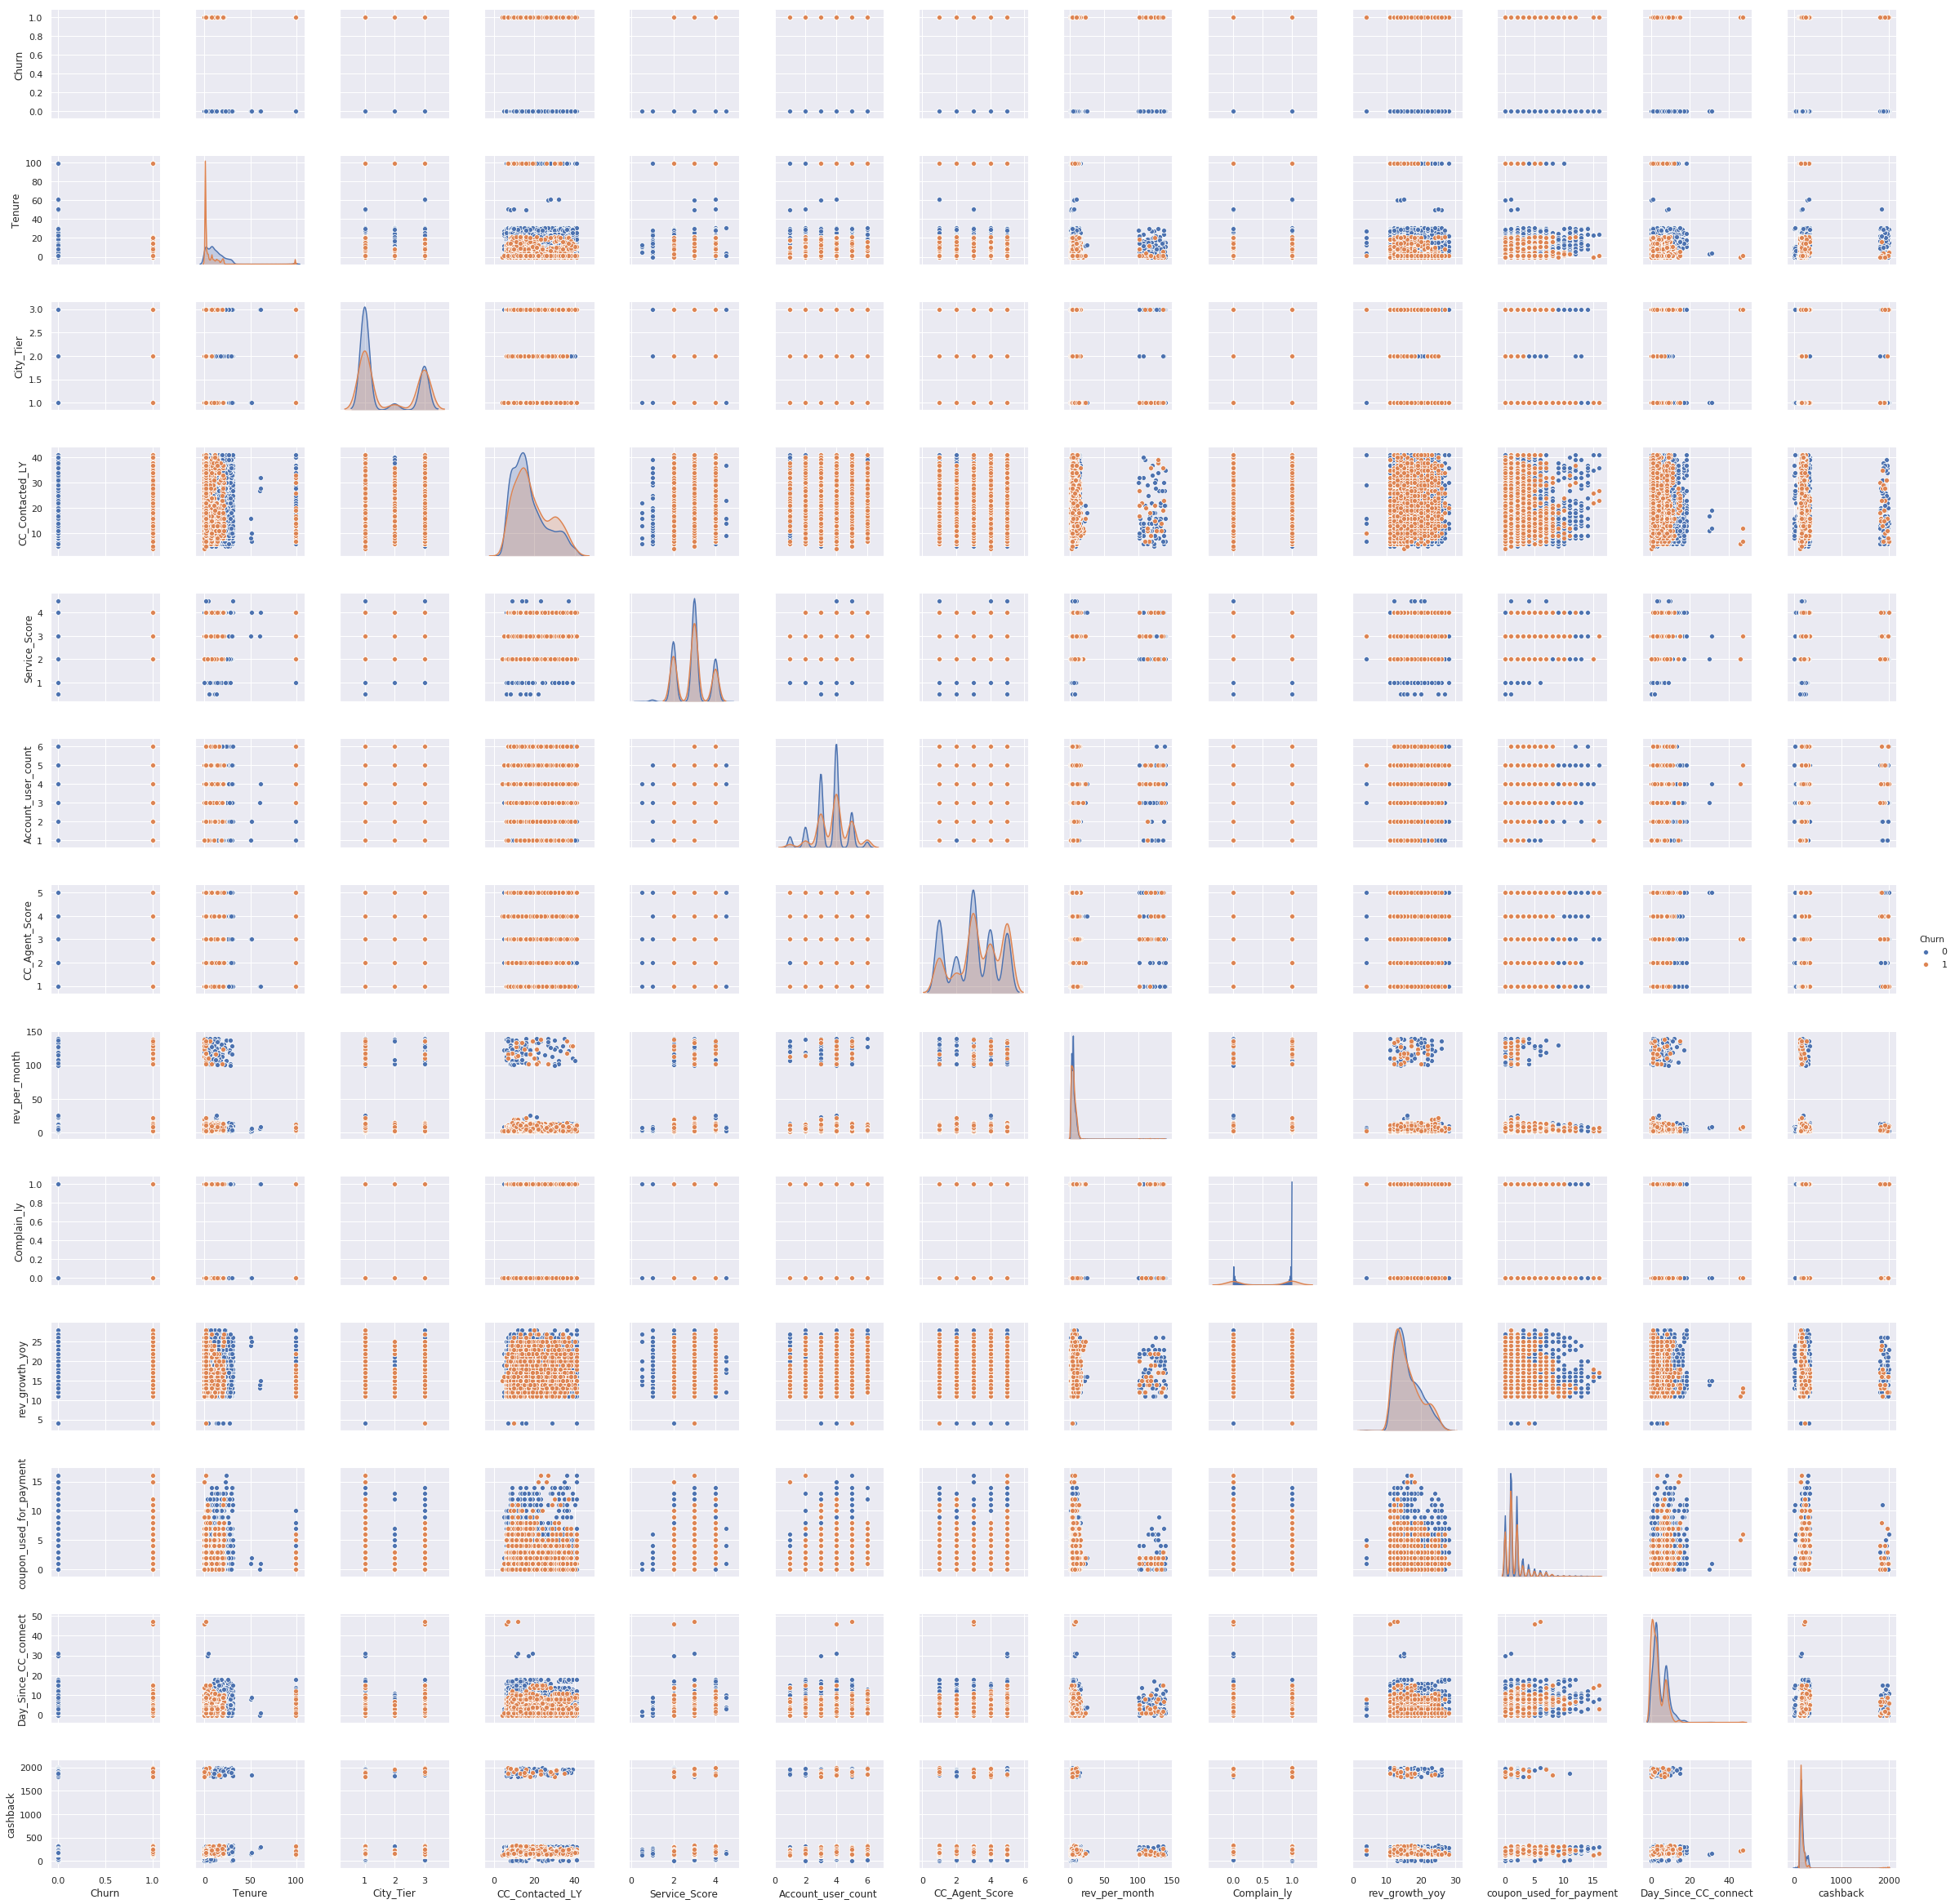

In [71]:
sns.pairplot(df, hue='Churn')

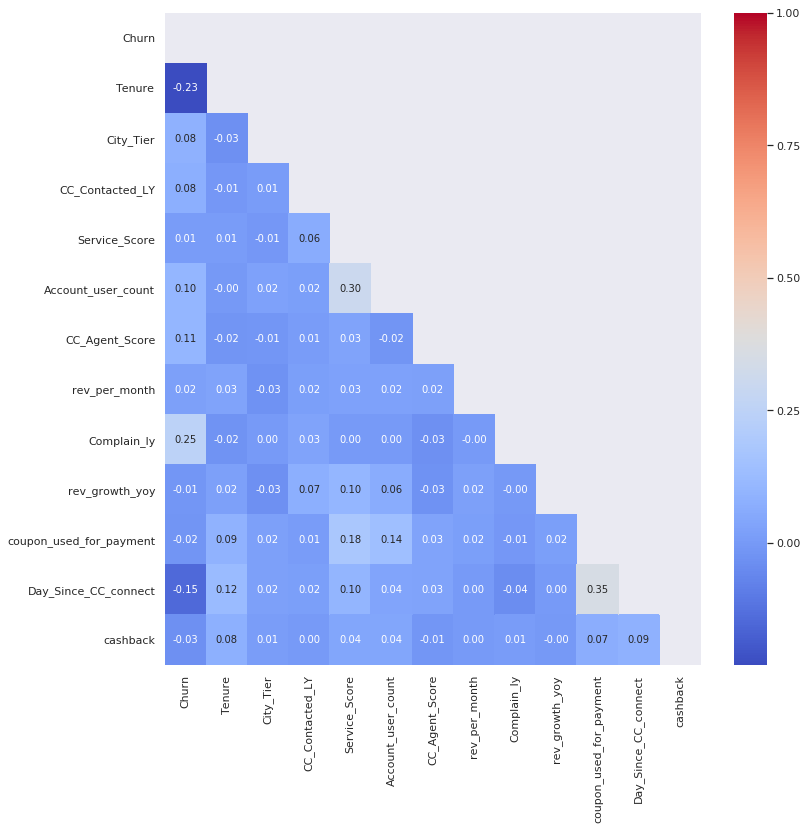

In [72]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 

plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt = '.2f',mask=mask)


# CLustering

In [73]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [76]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [77]:
data_scaled.var()

Churn                      1.000089
Tenure                     1.000089
City_Tier                  1.000089
CC_Contacted_LY            1.000089
Service_Score              1.000089
Account_user_count         1.000089
CC_Agent_Score             1.000089
rev_per_month              1.000089
Complain_ly                1.000089
rev_growth_yoy             1.000089
coupon_used_for_payment    1.000089
Day_Since_CC_connect       1.000089
cashback                   1.000089
dtype: float64

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [79]:
wardlink = linkage(data_scaled, method = 'ward')


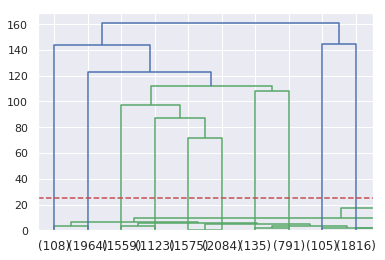

In [80]:
dend = dendrogram(wardlink)
plt.axhline(y=25, color='r', linestyle='--')

dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [81]:
from scipy.cluster.hierarchy import fcluster


In [82]:

#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [83]:
df['clusters'] = clusters

df.clusters.value_counts().sort_index()

1    9339
2     105
3    1816
Name: clusters, dtype: int64

In [84]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

Churn     Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
clusters                                                                   
1         0.006103  12.427669   1.615483        17.530892       2.901649   
2         0.219048  10.333333   1.438095        17.695238       2.857143   
3         1.000000   3.169604   1.823789        19.283040       2.915749   

          Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
clusters                                                                   
1                   3.597601        3.003426       5.139522     0.227862   
2                   3.723810        3.209524     120.409524     0.304762   
3                   3.890419        3.378304       5.464758     0.523678   

          rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
clusters                                                                  
1              16.202484                 1.809830              4.828890   
2              16.552381                 1.904762              5.057143   
3              16.105727                 1.690529              3.280837   

            cashback  Freq  
clusters                    
1         201.409810  9339  
2         180.939524   105  
3         162.264807  1816

In [93]:
df.groupby(['clusters','Gender'])['Churn'].sum()


clusters  Gender 
1         Female       17.0
          Male         18.0
          No_info      22.0
2         Female       10.0
          Male         13.0
3         Female      662.0
          Male       1154.0
Name: Churn, dtype: float64

In [95]:
df.groupby(['clusters','account_segment'])['Churn'].sum()


clusters  account_segment
1         HNI                   8.0
          No_info               0.0
          Regular               3.0
          Regular +            30.0
          Super                16.0
          Super +               0.0
2         HNI                   3.0
          Regular               0.0
          Regular +            17.0
          Super                 2.0
          Super +               1.0
3         HNI                 244.0
          No_info              18.0
          Regular              37.0
          Regular +          1080.0
          Super               398.0
          Super +              39.0
Name: Churn, dtype: float64

In [96]:
df.groupby(['clusters','Login_device'])['Churn'].sum()


clusters  Login_device
1         Computer           9.0
          Mobile            48.0
          No_info            0.0
2         Computer           8.0
          Mobile            15.0
3         Computer         580.0
          Mobile          1109.0
          No_info          127.0
Name: Churn, dtype: float64

In [97]:
df = df.drop("clusters", axis=1)


# Grouping into ordinal or nominal or categorical

In [98]:

df['Tenure']=np.where(df['Tenure'] ==0, 0, df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==1, 1, df['Tenure'])

df['Tenure']=np.where((df['Tenure'] >=2) & (df['Tenure'] <=5), 2, df['Tenure'])
df['Tenure']=np.where((df['Tenure'] >=6) & (df['Tenure'] <=10), 3, df['Tenure'])
df['Tenure']=np.where((df['Tenure'] >=11) & (df['Tenure'] <=15), 4, df['Tenure'])
df['Tenure']=np.where((df['Tenure'] >=16) & (df['Tenure'] <=20), 5, df['Tenure'])
df['Tenure']=np.where((df['Tenure'] >=21) & (df['Tenure'] <=25), 6, df['Tenure'])
df['Tenure']=np.where(df['Tenure'] >=26 , 7, df['Tenure'])


In [99]:
df['Tenure']=df['Tenure'].astype(object)
df['Tenure']=np.where(df['Tenure'] ==0.0, '0', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==1.0, '1', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==2.0, '2-5', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==3.0, '6-10', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==4.0, '11-15', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==5.0, '15-20', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==6.0, '21-25', df['Tenure'])
df['Tenure']=np.where(df['Tenure'] ==7.0, '26+', df['Tenure'])



In [100]:
df['Tenure'].value_counts(normalize=True).sort_values()

21-25    0.066696
26+      0.077798
0        0.109325
15-20    0.110924
1        0.119982
2-5      0.149734
11-15    0.156572
6-10     0.208970
Name: Tenure, dtype: float64

In [101]:

df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==4, 1, df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==5, 1, df['CC_Contacted_LY'])

df['CC_Contacted_LY']=np.where((df['CC_Contacted_LY'] >=6) & (df['CC_Contacted_LY'] <=10), 2, df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where((df['CC_Contacted_LY'] >=11) & (df['CC_Contacted_LY'] <=15), 3, df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where((df['CC_Contacted_LY'] >=16) & (df['CC_Contacted_LY'] <=20), 4, df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where((df['CC_Contacted_LY'] >=21) & (df['CC_Contacted_LY'] <=25), 5, df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] >=26 , 6, df['CC_Contacted_LY'])


In [102]:
df['CC_Contacted_LY']=df['CC_Contacted_LY'].astype(object)
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==1.0, '4-5', df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==2.0, '6-10', df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==3.0, '11-15', df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==4.0, '15-20', df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==5.0, '21-25', df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY'] ==6.0, '26+', df['CC_Contacted_LY'])



In [103]:
df['CC_Contacted_LY'].value_counts(normalize=True).sort_values()

4-5      0.000799
21-25    0.110480
26+      0.197247
15-20    0.208437
6-10     0.211723
11-15    0.271314
Name: CC_Contacted_LY, dtype: float64

In [104]:
df['Service_Score']=df['Service_Score'].astype(object)
df['Service_Score']=np.where(df['Service_Score'] ==0.0, '0-1', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==1.0, '0-1', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==2.0, '2', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==3.0, '3', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==4.0, '4', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==5.0, '5+', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==4.5, '5+', df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score'] ==0.5, '0-1', df['Service_Score'])



In [105]:
df['Service_Score'].value_counts(normalize=True).sort_values()

5+     0.000444
0-1    0.007549
4      0.207016
2      0.288721
3      0.496270
Name: Service_Score, dtype: float64

In [106]:
df['Account_user_count']=df['Account_user_count'].astype(object)
df['Account_user_count']=np.where(df['Account_user_count'] ==1.0, '1-2', df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count'] ==2.0, '1-2', df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count'] ==3.0, '3', df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count'] ==4.0, '4', df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count'] ==5.0, '5+', df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count'] ==6.0, '5+', df['Account_user_count'])



In [107]:
df['Account_user_count'].value_counts(normalize=True).sort_values()

1-2    0.115808
5+     0.178863
3      0.289609
4      0.415719
Name: Account_user_count, dtype: float64

In [108]:
df['account_segment']=df['account_segment'].astype(object)
df['account_segment']=np.where(df['account_segment'] =='Regular', '1.Regular users', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Regular +', '1.Regular users', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Super', '2.Super users', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Super +', '2.Super users', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='HNI', '3.HNI', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='No_info', '0.No_info', df['account_segment'])



In [109]:
df['account_segment'].value_counts(normalize=True).sort_values()

0.No_info          0.008615
3.HNI              0.145560
1.Regular users    0.412433
2.Super users      0.433393
Name: account_segment, dtype: float64

In [110]:

df['rev_per_month']=np.where((df['rev_per_month'] >=1) & (df['rev_per_month'] <=5), 1, df['rev_per_month'])
df['rev_per_month']=np.where((df['rev_per_month'] >=6) & (df['rev_per_month'] <=10), 2, df['rev_per_month'])
df['rev_per_month']=np.where((df['rev_per_month'] >=11) & (df['rev_per_month'] <=15),3, df['rev_per_month'])
df['rev_per_month']=np.where((df['rev_per_month'] >=16) & (df['rev_per_month'] <=20), 4, df['rev_per_month'])
df['rev_per_month']=np.where((df['rev_per_month'] >=21) & (df['rev_per_month'] <=25), 5, df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] >=26 , 7, df['rev_per_month'])


In [111]:
df['rev_per_month']=df['rev_per_month'].astype(object)
df['rev_per_month']=np.where(df['rev_per_month'] ==1.0, '1-5', df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] ==2.0, '6-10', df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] ==3.0, '11-15', df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] ==4.0, '16-20', df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] ==5.0, '21-25', df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month'] ==7.0, '26+', df['rev_per_month'])



In [112]:
df['rev_per_month'].value_counts(normalize=True).sort_values()

16-20    0.000266
21-25    0.000444
26+      0.009325
11-15    0.054085
6-10     0.307194
1-5      0.628686
Name: rev_per_month, dtype: float64

In [113]:

df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==0, 0, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==1, 1, df['coupon_used_for_payment'])

df['coupon_used_for_payment']=np.where((df['coupon_used_for_payment'] >=2) & (df['coupon_used_for_payment'] <=5), 2, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where((df['coupon_used_for_payment'] >=6) & (df['coupon_used_for_payment'] <=10), 3, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where((df['coupon_used_for_payment'] >=11) & (df['coupon_used_for_payment'] <=15), 4, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where((df['coupon_used_for_payment'] >=16) & (df['coupon_used_for_payment'] <=20), 5, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where((df['coupon_used_for_payment'] >=21) & (df['coupon_used_for_payment'] <=25), 6, df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] >=26 , 7, df['coupon_used_for_payment'])


In [114]:
df['coupon_used_for_payment']=df['coupon_used_for_payment'].astype(object)
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==0.0, '0', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==1.0, '1', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==2.0, '2-5', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==3.0, '6-10', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==4.0, '11-15', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==5.0, '15-20', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==6.0, '21-25', df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment'] ==7.0, '26+', df['coupon_used_for_payment'])



In [115]:
df['coupon_used_for_payment'].value_counts(normalize=True).sort_values()

15-20    0.000355
11-15    0.008348
6-10     0.051066
0        0.190941
2-5      0.360924
1        0.388366
Name: coupon_used_for_payment, dtype: float64

In [116]:

df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==0, 0, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==1, 1, df['Day_Since_CC_connect'])

df['Day_Since_CC_connect']=np.where((df['Day_Since_CC_connect'] >=2) & (df['Day_Since_CC_connect'] <=5), 2, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where((df['Day_Since_CC_connect'] >=6) & (df['Day_Since_CC_connect'] <=10), 3, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where((df['Day_Since_CC_connect'] >=11) & (df['Day_Since_CC_connect'] <=15), 4, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where((df['Day_Since_CC_connect'] >=16) & (df['Day_Since_CC_connect'] <=20), 5, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where((df['Day_Since_CC_connect'] >=21) & (df['Day_Since_CC_connect'] <=25), 6, df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] >=26 , 7, df['Day_Since_CC_connect'])


In [117]:
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].astype(object)
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==0.0, '0', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==1.0, '1', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==2.0, '2-5', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==3.0, '6-10', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==4.0, '11-15', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==5.0, '15-20', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==6.0, '21-25', df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect'] ==7.0, '26+', df['Day_Since_CC_connect'])



In [118]:
df['Day_Since_CC_connect'].value_counts(normalize=True).sort_values()

26+      0.000622
15-20    0.007638
11-15    0.049467
0        0.085613
1        0.111545
6-10     0.290409
2-5      0.454707
Name: Day_Since_CC_connect, dtype: float64

In [119]:

df['cashback']=np.where(df['cashback'] <100, 1, df['cashback'])

df['cashback']=np.where((df['cashback'] >=100) & (df['cashback'] <=120.0), 2, df['cashback'])
df['cashback']=np.where((df['cashback'] >120) & (df['cashback'] <=140), 3, df['cashback'])
df['cashback']=np.where((df['cashback'] >140) & (df['cashback'] <=160), 4, df['cashback'])
df['cashback']=np.where((df['cashback'] >160) & (df['cashback'] <=180), 5, df['cashback'])
df['cashback']=np.where((df['cashback'] >180) & (df['cashback'] <=200), 6, df['cashback'])
df['cashback']=np.where(df['cashback'] >200 , 7, df['cashback'])


In [120]:
df['cashback']=df['cashback'].astype(object)
df['cashback']=np.where(df['cashback'] ==1.0, '<100', df['cashback'])
df['cashback']=np.where(df['cashback'] ==2.0, '100-120', df['cashback'])
df['cashback']=np.where(df['cashback'] ==3.0, '120-140', df['cashback'])
df['cashback']=np.where(df['cashback'] ==4.0, '140-160', df['cashback'])
df['cashback']=np.where(df['cashback'] ==5.0, '160-180', df['cashback'])
df['cashback']=np.where(df['cashback'] ==6.0, '180-200', df['cashback'])
df['cashback']=np.where(df['cashback'] ==7.0, '200+', df['cashback'])



In [121]:
df['cashback'].value_counts(normalize=True).sort_values()

<100       0.002131
100-120    0.009236
180-200    0.107282
120-140    0.160480
160-180    0.221847
200+       0.239520
140-160    0.259503
Name: cashback, dtype: float64

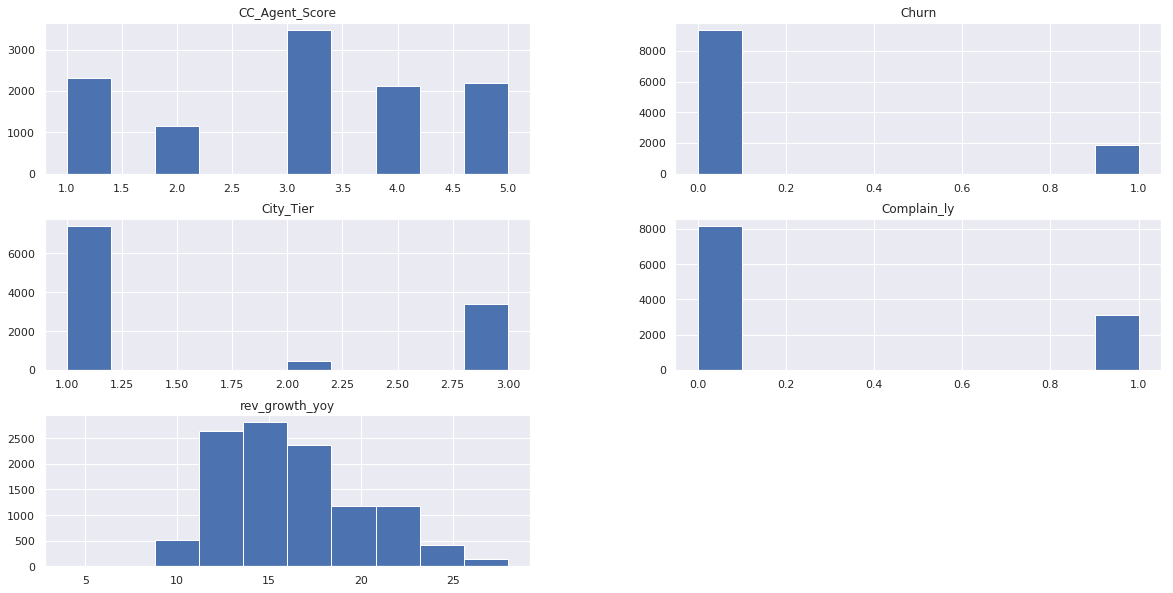

In [122]:
df.hist(bins=10, figsize=(20,10))
plt.show()

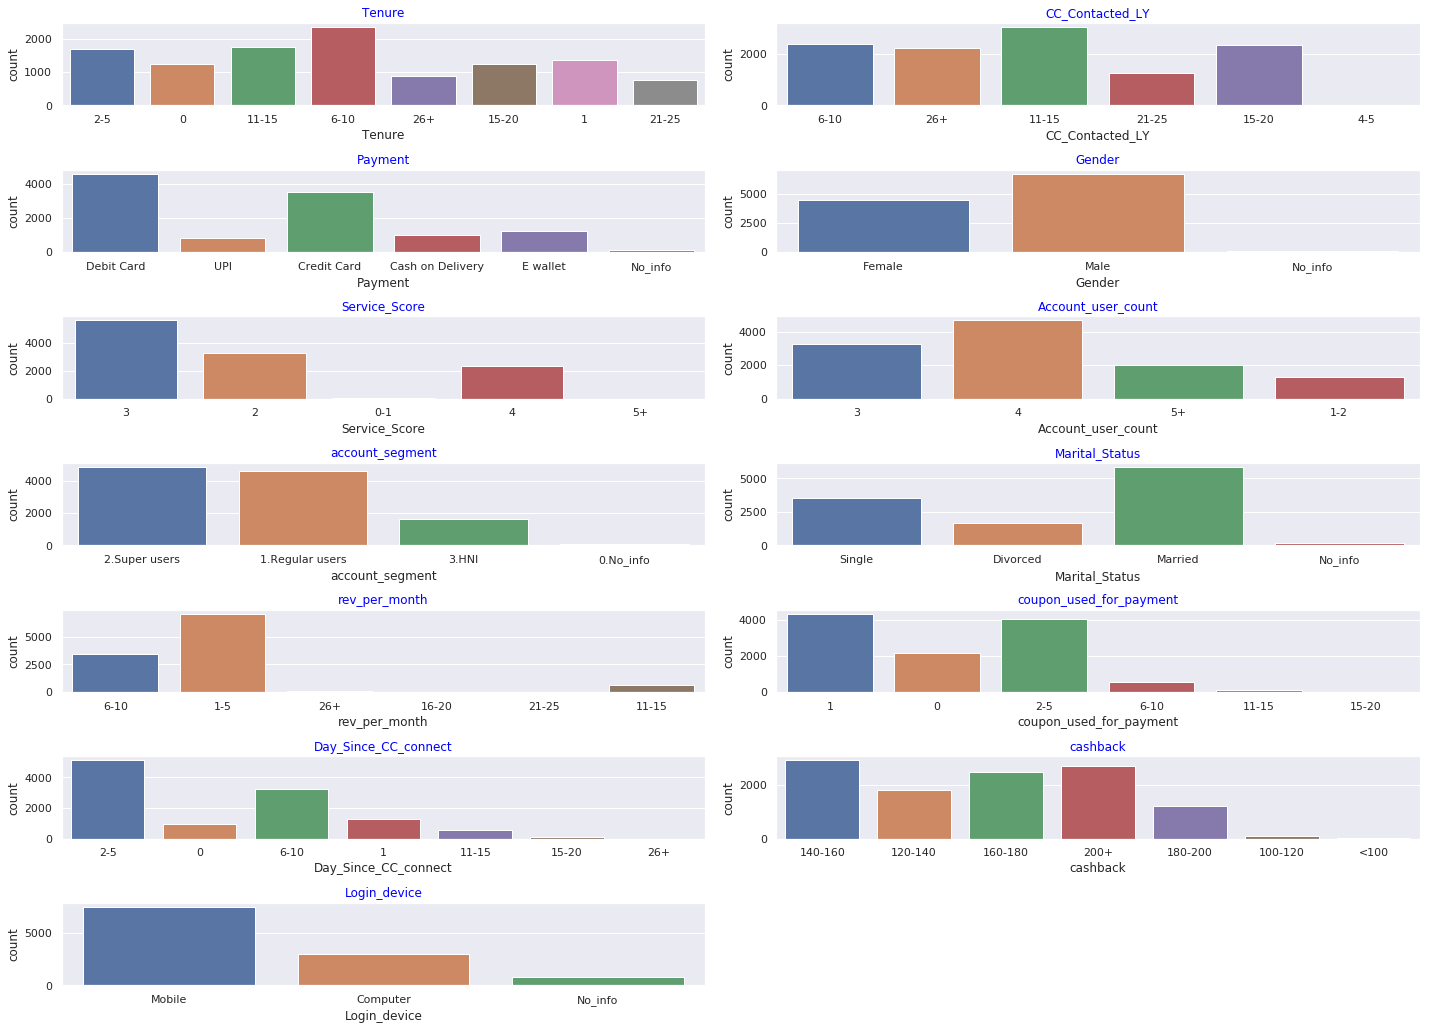

In [123]:
data_plot=df[df.dtypes[df.dtypes=='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

plt.tight_layout()

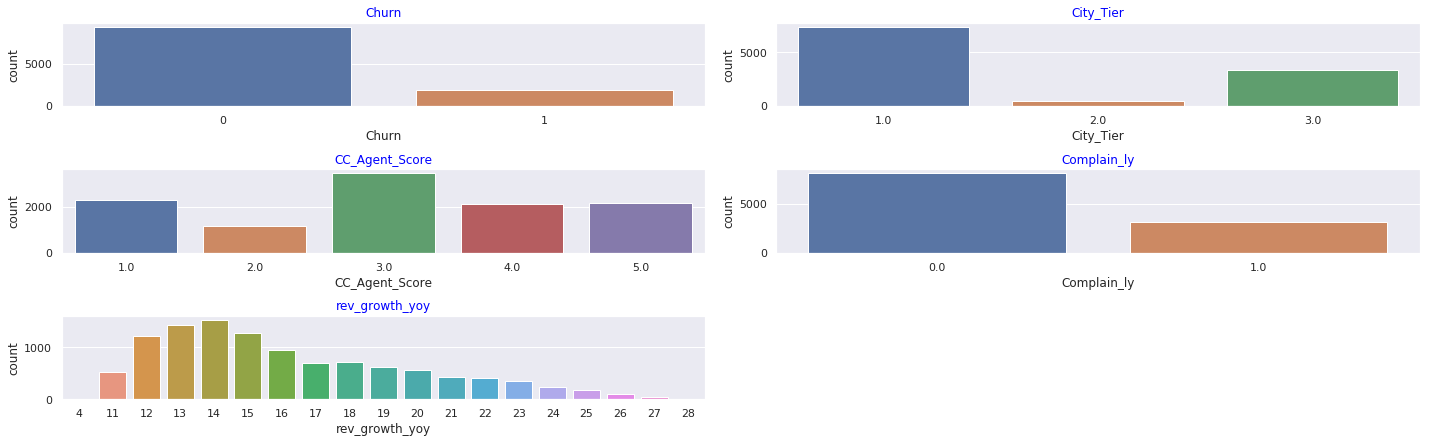

In [124]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

plt.tight_layout()

# Convert all the features into categorical

In [125]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[2-5, 0, 11-15, 6-10, 26+, 15-20, 1, 21-25]
Categories (8, object): [0, 1, 11-15, 15-20, 2-5, 21-25, 26+, 6-10]
[4 0 2 7 6 3 1 5]


feature: CC_Contacted_LY
[6-10, 26+, 11-15, 21-25, 15-20, 4-5]
Categories (6, object): [11-15, 15-20, 21-25, 26+, 4-5, 6-10]
[5 3 0 2 1 4]


feature: Payment
[Debit Card, UPI, Credit Card, Cash on Delivery, E wallet, No_info]
Categories (6, object): [Cash on Delivery, Credit Card, Debit Card, E wallet, No_info, UPI]
[2 5 1 0 3 4]


feature: Gender
[Female, Male, No_info]
Categories (3, object): [Female, Male, No_info]
[0 1 2]


feature: Service_Score
[3, 2, 0-1, 4, 5+]
Categories (5, object): [0-1, 2, 3, 4, 5+]
[2 1 0 3 4]


feature: Account_user_count
[3, 4, 5+, 1-2]
Categories (4, object): [1-2, 3, 4, 5+]
[1 2 3 0]


feature: account_segment
[2.Super users, 1.Regular users, 3.HNI, 0.No_info]
Categories (4, object): [0.No_info, 1.Regular users, 2.Super users, 3.HNI]
[2 1 3 0]


feature: Marital_Status
[Single, Divorced, Married, No_info]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
Churn                      11260 non-null int8
Tenure                     11260 non-null int8
City_Tier                  11260 non-null float64
CC_Contacted_LY            11260 non-null int8
Payment                    11260 non-null int8
Gender                     11260 non-null int8
Service_Score              11260 non-null int8
Account_user_count         11260 non-null int8
account_segment            11260 non-null int8
CC_Agent_Score             11260 non-null float64
Marital_Status             11260 non-null int8
rev_per_month              11260 non-null int8
Complain_ly                11260 non-null float64
rev_growth_yoy             11260 non-null int64
coupon_used_for_payment    11260 non-null int8
Day_Since_CC_connect       11260 non-null int8
cashback                   11260 non-null int8
Login_device               11260 non-null int8
dtypes: float64(3), int64(1), int8(

# UNIVARIATE ANALISYS

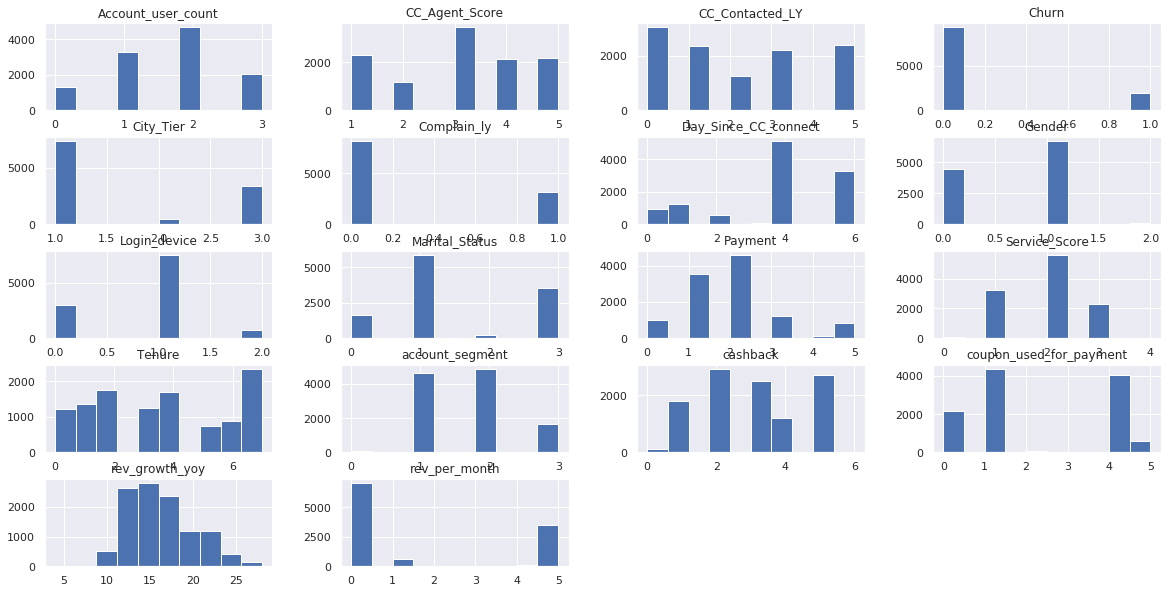

In [127]:
df.hist(bins=10, figsize=(20,10))
plt.show()

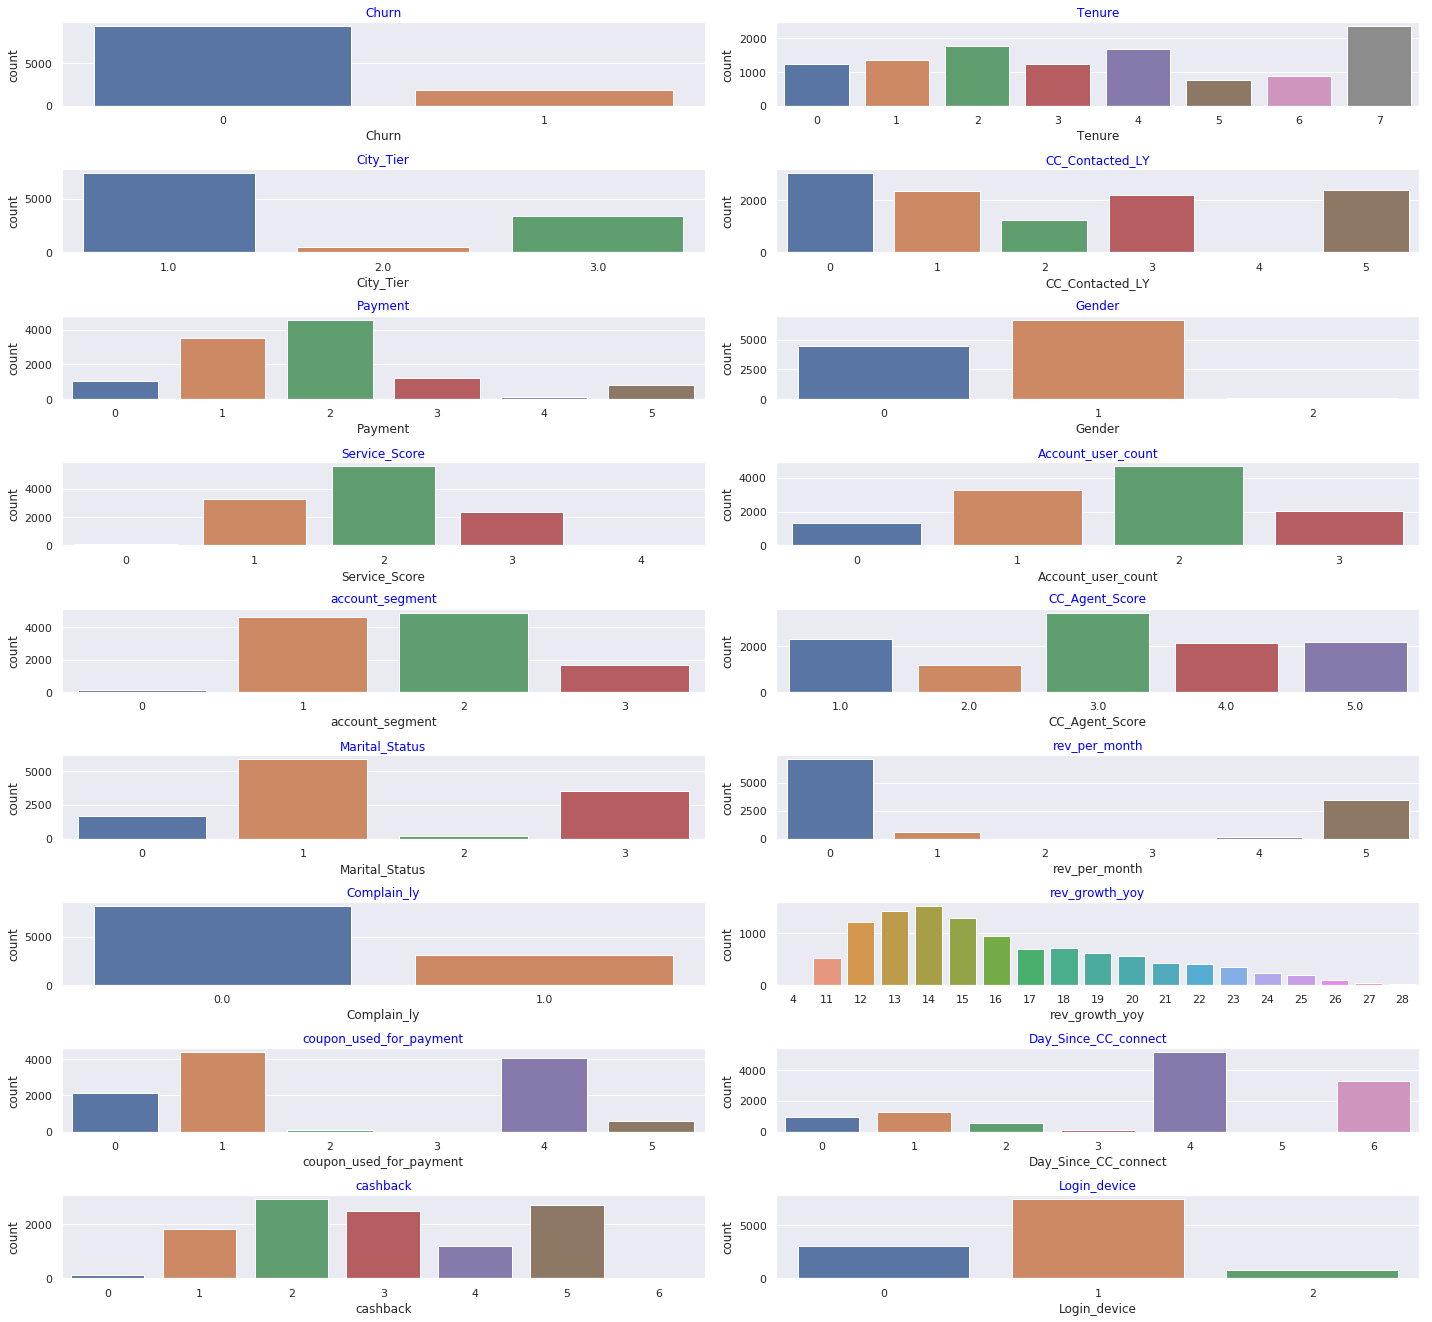

In [128]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.countplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

plt.tight_layout()

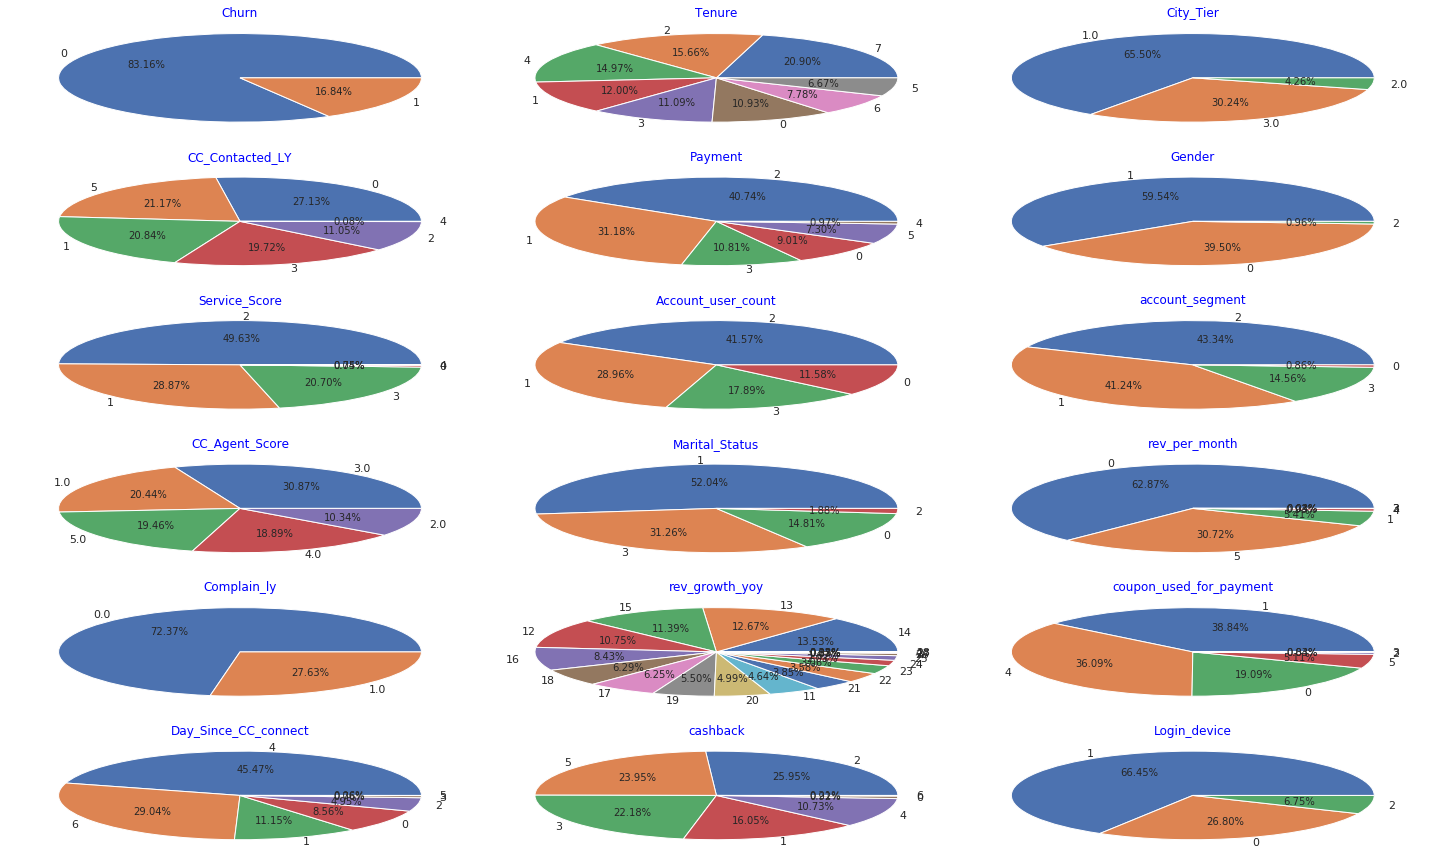

In [129]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(10,3,i+1)
    plt.pie(x = data_plot[data_plot.columns[i]].value_counts(),labels =data_plot[data_plot.columns[i]].value_counts().index,autopct = '%1.2f%%')
    ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

In [130]:
data_plot.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0      1       4        3.0                5        2       0              2   
1      1       0        1.0                5        5       1              2   
2      1       0        1.0                3        2       1              1   
3      1       0        3.0                0        2       1              1   
4      1       0        1.0                0        1       1              1   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                   1                2             2.0               3   
1                   2                1             3.0               3   
2                   2                1             3.0               3   
3                   2                2             5.0               3   
4                   1                1             5.0               3   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0              5          1.0              11                        1   
1              5          1.0              15                        0   
2              5          1.0              14                        0   
3              5          0.0              23                        0   
4              0          0.0              11                        1   

   Day_Since_CC_connect  cashback  Login_device  
0                     4         2             1  
1                     0         1             1  
2                     4         3             1  
3                     4         1             1  
4                     4         1             1

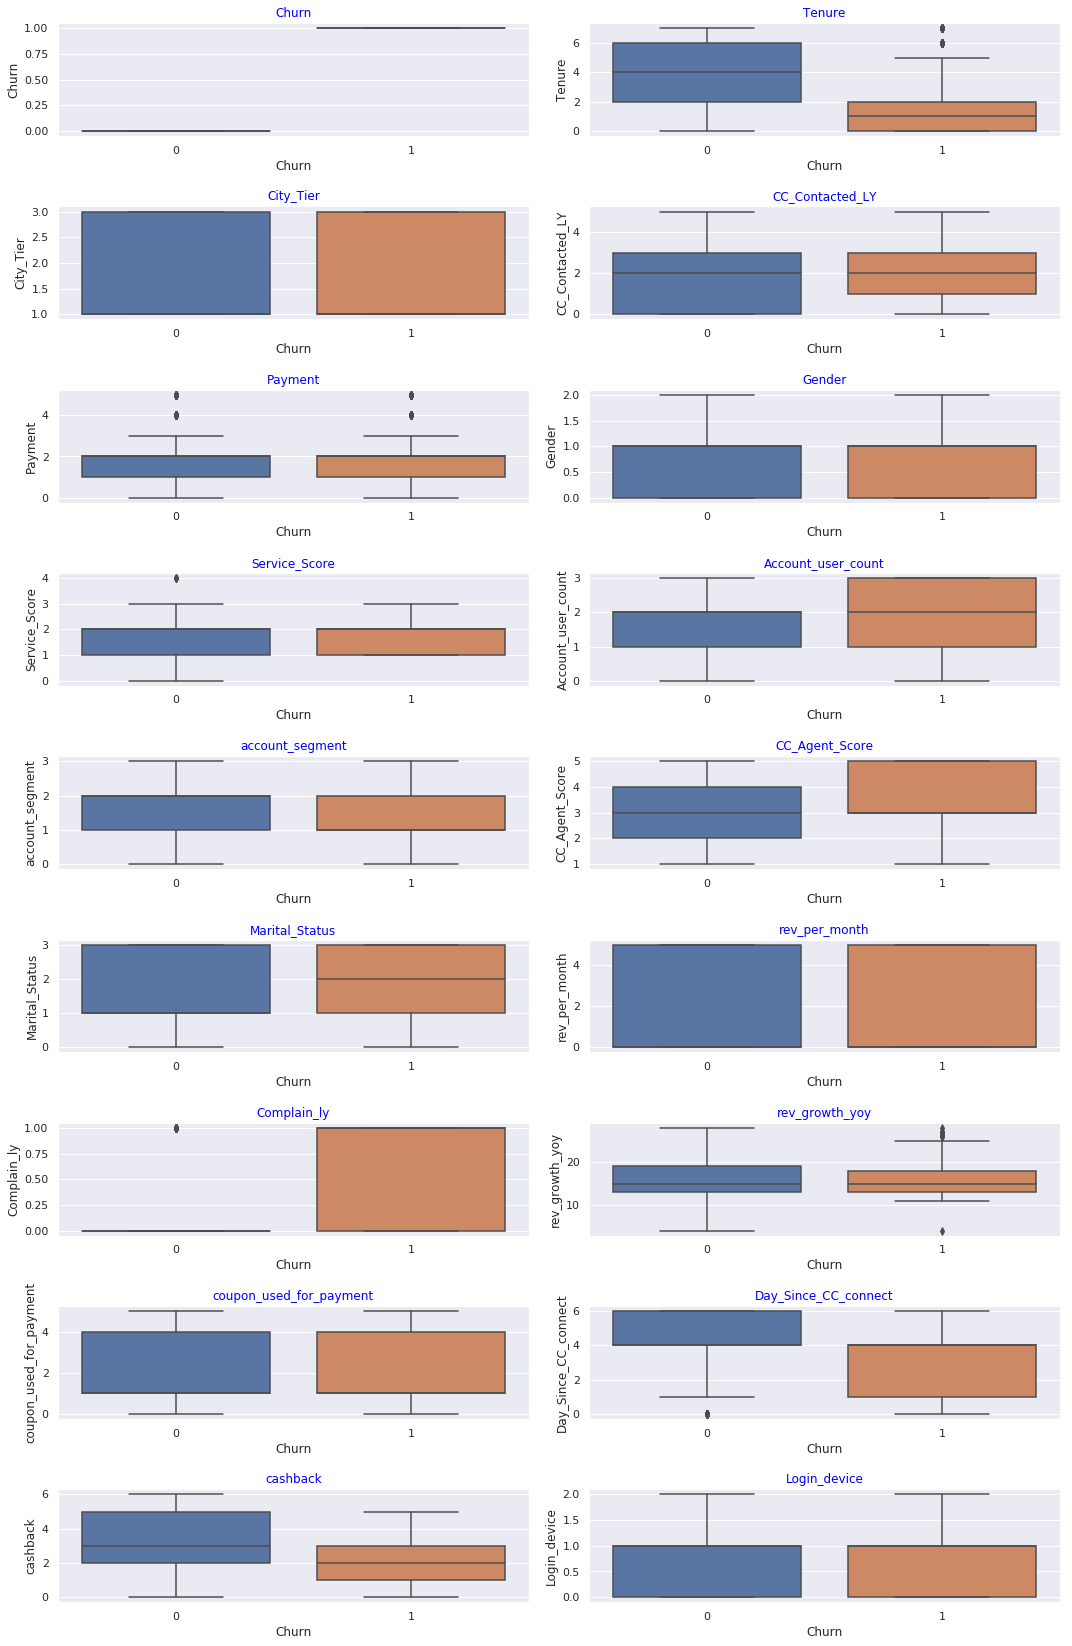

In [131]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(15,25))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(10,2,i+1)
   sns.boxplot(data_plot["Churn"], data_plot[data_plot.columns[i]]) 
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

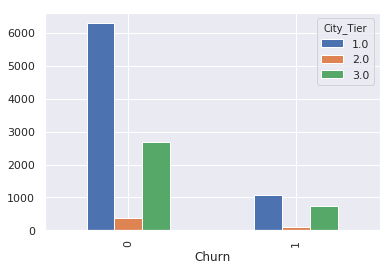

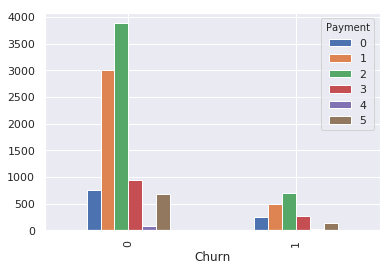

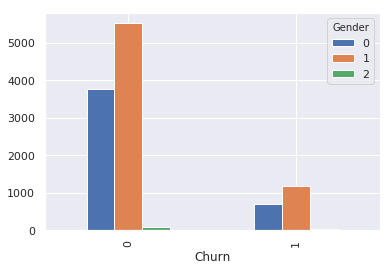

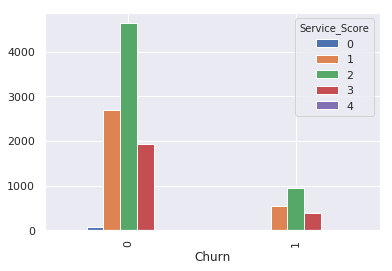

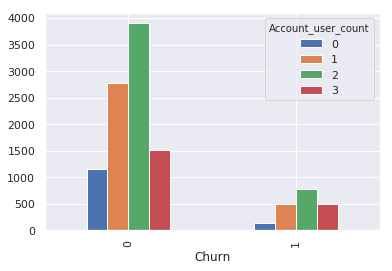

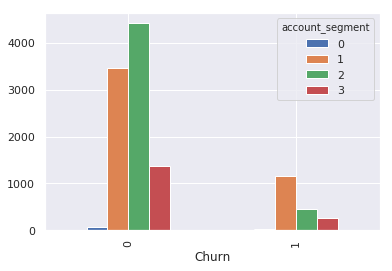

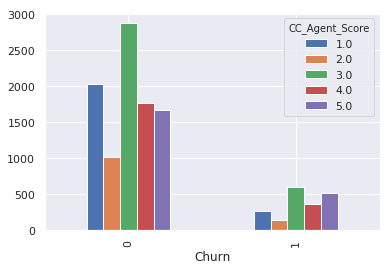

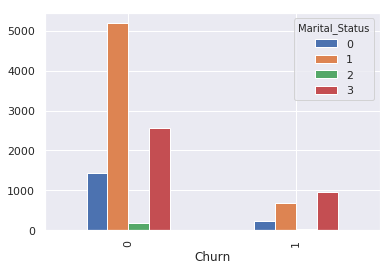

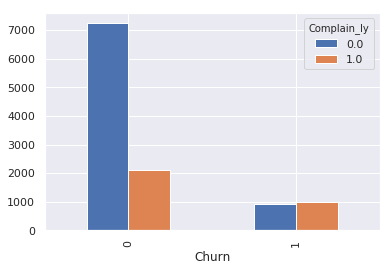

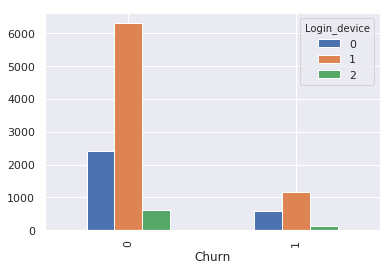

In [132]:
       
pd.crosstab(df['Churn'], df['City_Tier']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Payment']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Gender']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Service_Score']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Account_user_count']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['account_segment']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['CC_Agent_Score']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Marital_Status']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Complain_ly']).plot(kind='bar', stacked=False)
pd.crosstab(df['Churn'], df['Login_device']).plot(kind='bar', stacked=False)


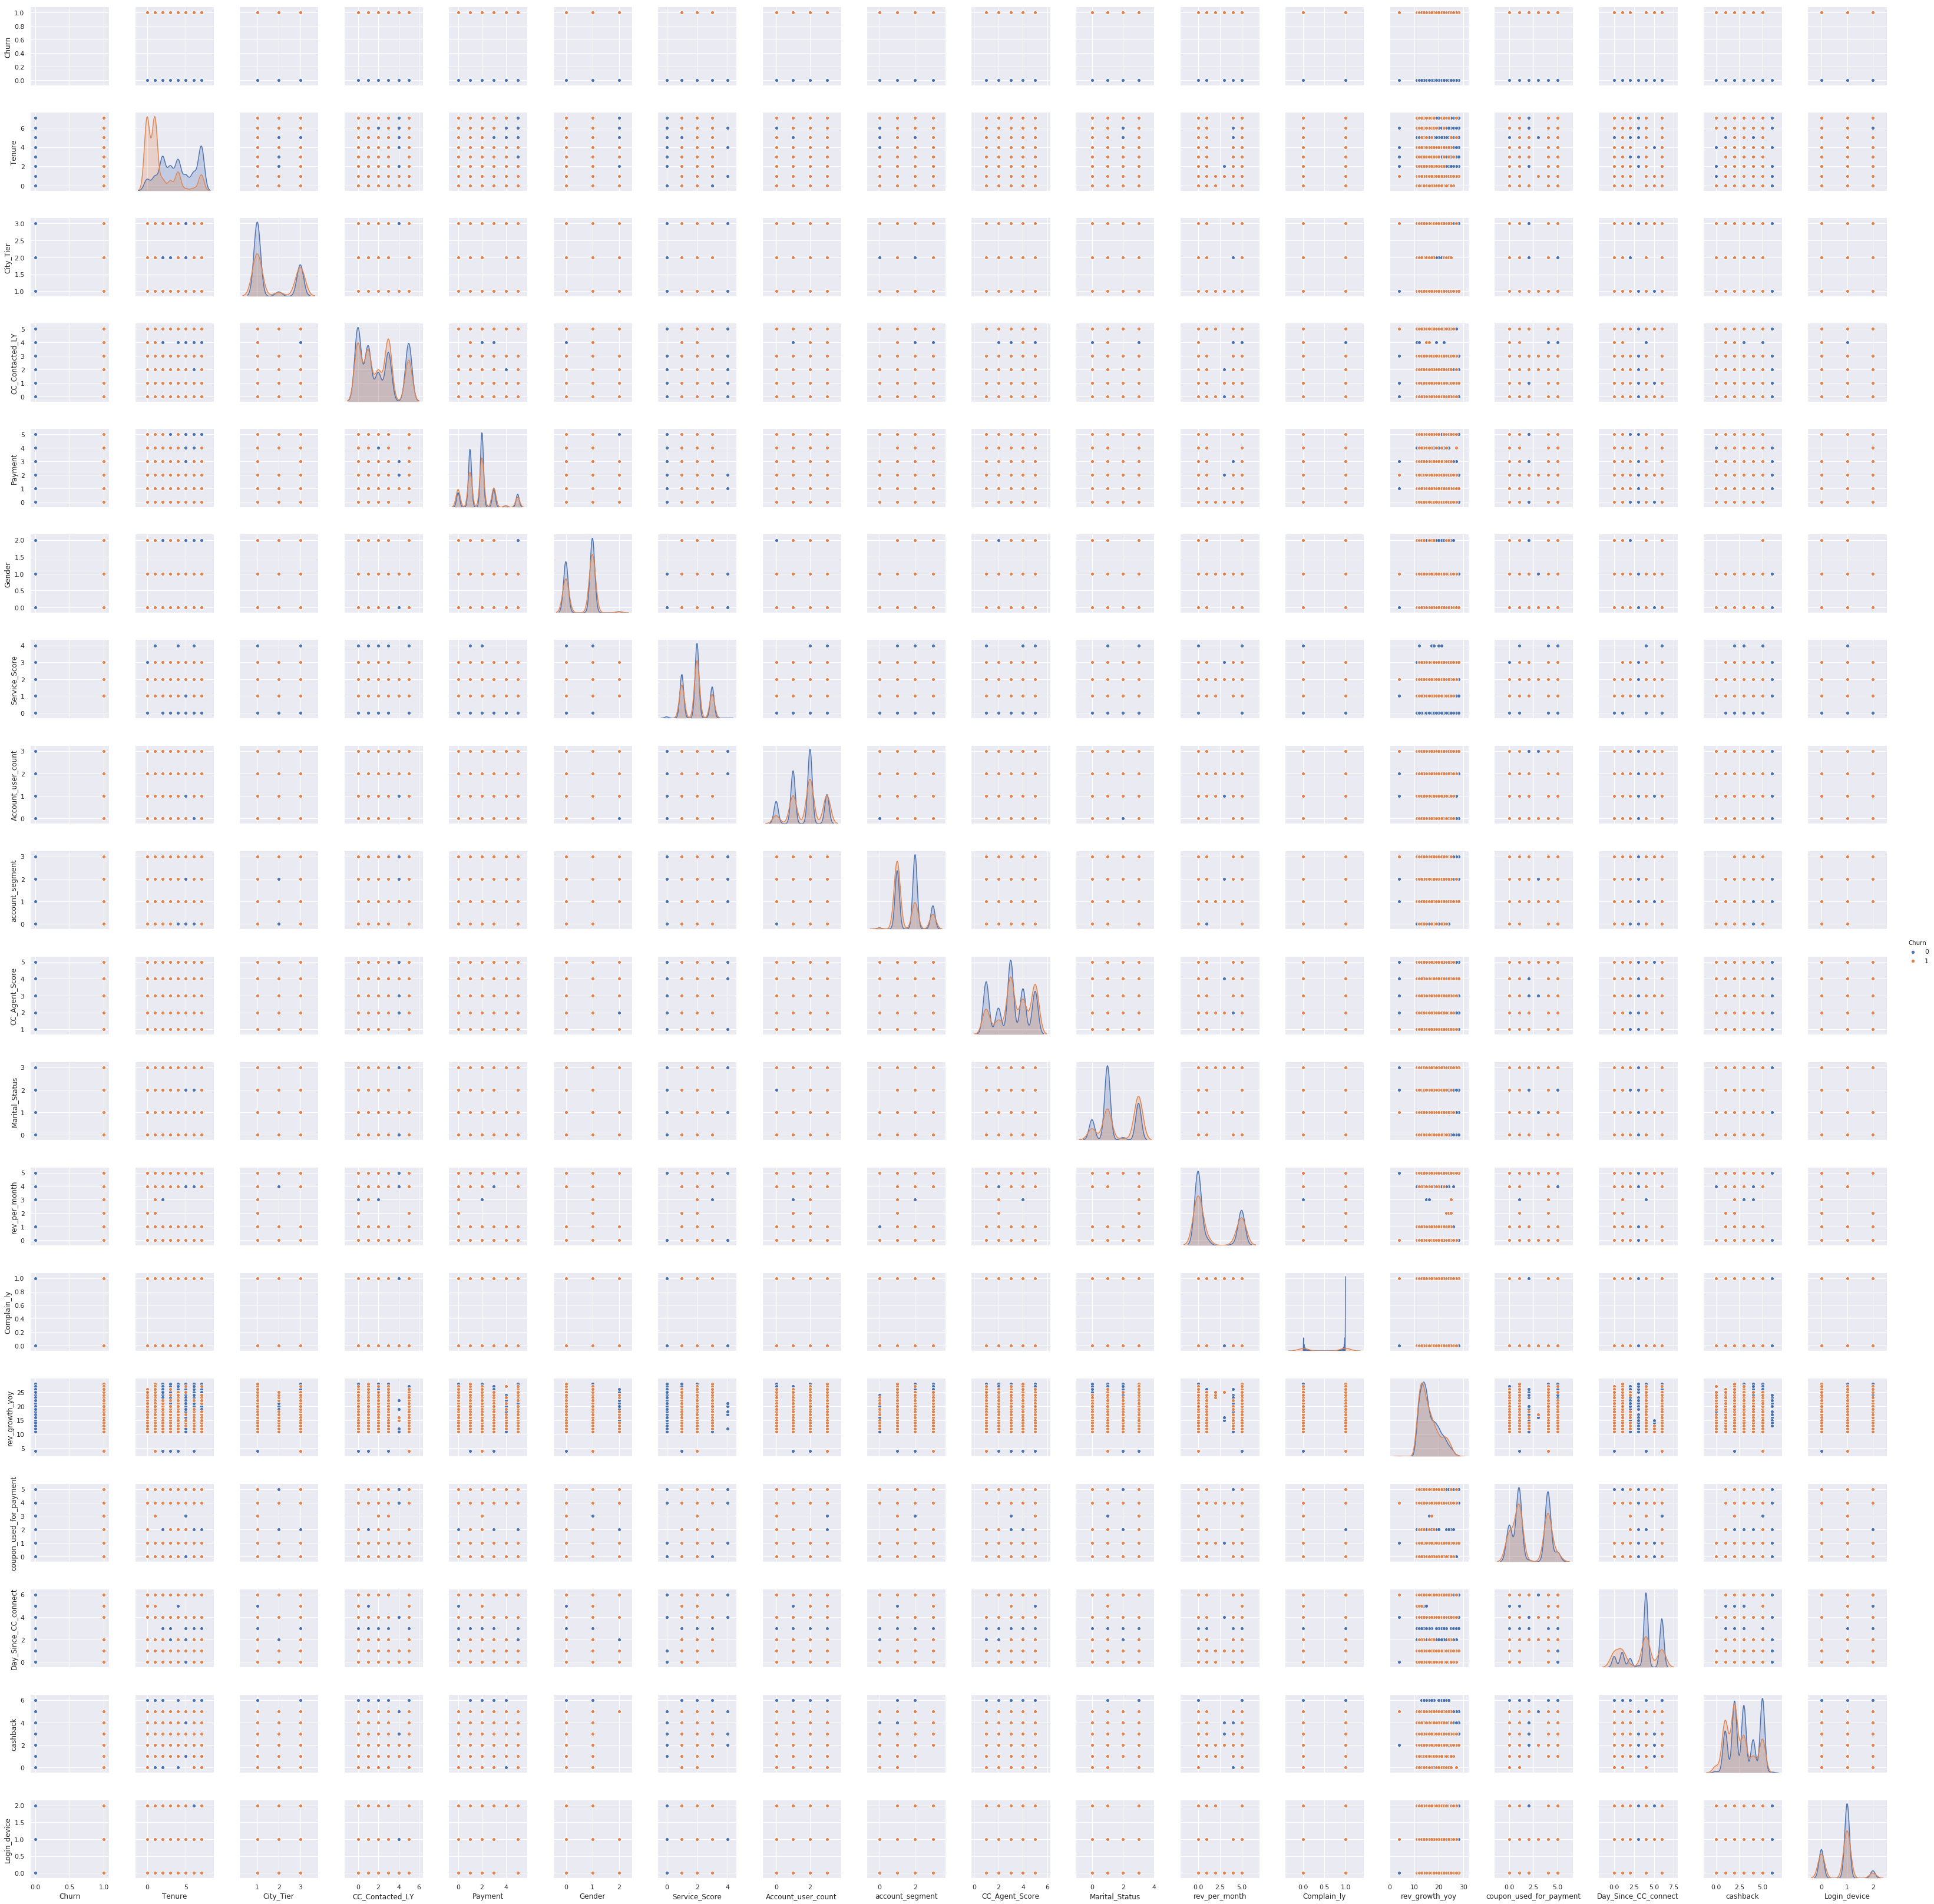

In [133]:
sns.pairplot(df, hue='Churn')


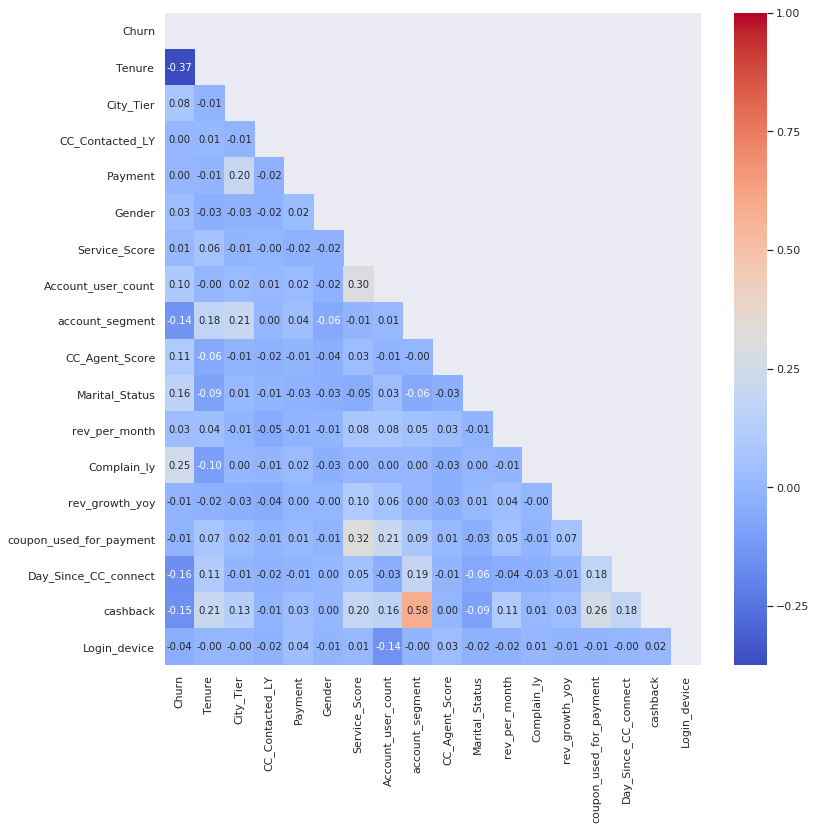

In [134]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 

plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt = '.2f',mask=mask)


# Feature encoding

In [135]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

In [136]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [138]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [139]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [140]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df.sort_values(by='VIF'))

                    feature        VIF
11              Complain_ly   1.379095
10            rev_per_month   1.556433
2           CC_Contacted_LY   2.187244
4                    Gender   2.404159
9            Marital_Status   2.786678
13  coupon_used_for_payment   2.979898
16             Login_device   3.085188
3                   Payment   3.404574
0                    Tenure   3.438142
1                 City_Tier   4.524300
6        Account_user_count   4.892673
14     Day_Since_CC_connect   5.072105
8            CC_Agent_Score   5.342179
15                 cashback   9.280683
5             Service_Score   9.411288
7           account_segment  10.575528
12           rev_growth_yoy  13.616557


In [141]:
X_train = X_train.drop(["Day_Since_CC_connect","cashback","account_segment","CC_Agent_Score","rev_growth_yoy","Service_Score"], axis=1)
X_test = X_test.drop(["Day_Since_CC_connect","cashback","account_segment","CC_Agent_Score","rev_growth_yoy","Service_Score"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 11)
X_test (3378, 11)


In [142]:
print('X_test',X_test.shape)
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

X_test (3378, 11)
                    feature       VIF
0                    Tenure  2.928577
1                 City_Tier  3.955259
2           CC_Contacted_LY  2.100902
3                   Payment  3.286129
4                    Gender  2.260098
5        Account_user_count  4.001750
6            Marital_Status  2.599235
7             rev_per_month  1.501150
8               Complain_ly  1.349941
9   coupon_used_for_payment  2.524483
10             Login_device  2.760698


In [143]:
import statsmodels.api as sm

col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.333002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7870
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.2650
Time:                        21:40:27   Log-Likelihood:                -2624.7
converged:                       True   LL-Null:                       -3571.1
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3213      0.162    -14.333      0.000      -2.639      -2.004
Tenure                     -0.5452      0.020    -27.240      0.000      -0.584      -0.506
City_Tier                   0.2652      0.038      6.934      0.000       0.190       0.340
CC_Contacted_LY             0.0089      0.019      0.459      0.646      -0.029       0.047
Payment                    -0.0553      0.029     -1.890      0.059      -0.113       0.002
Gender                      0.2340      0.070      3.326      0.001       0.096       0.372
Account_user_count          0.3258      0.041      7.972      0.000       0.246       0.406
Marital_Status              0.3528      0.032     11.098      0.000       0.290       0.415
rev_per_month               0.0622      0.015      4.088      0.000       0.032       0.092
Complain_ly                 1.3778      0.072     19.101      0.000       1.236       1.519
coupon_used_for_payment     0.0161      0.021      0.767      0.443      -0.025       0.057
Login_device               -0.1222      0.065     -1.870      0.061      -0.250       0.006
===========================================================================================
"""

In [144]:
X_train = X_train.drop(['CC_Contacted_LY','coupon_used_for_payment'],axis=1)
X_test = X_test.drop(['CC_Contacted_LY','coupon_used_for_payment'],axis=1)

In [145]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.333051
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7872
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.2649
Time:                        21:40:27   Log-Likelihood:                -2625.1
converged:                       True   LL-Null:                       -3571.1
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2854      0.155    -14.755      0.000      -2.589      -1.982
Tenure                -0.5427      0.020    -27.490      0.000      -0.581      -0.504
City_Tier              0.2654      0.038      6.941      0.000       0.190       0.340
Payment               -0.0555      0.029     -1.895      0.058      -0.113       0.002
Gender                 0.2338      0.070      3.324      0.001       0.096       0.372
Account_user_count     0.3325      0.040      8.306      0.000       0.254       0.411
Marital_Status         0.3519      0.032     11.078      0.000       0.290       0.414
rev_per_month          0.0623      0.015      4.097      0.000       0.032       0.092
Complain_ly            1.3770      0.072     19.093      0.000       1.236       1.518
Login_device          -0.1217      0.065     -1.864      0.062      -0.250       0.006
======================================================================================
"""

In [146]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#
chi2_features = SelectKBest(score_func = chi2, k = "all")
X_train_kbest = chi2_features.fit(X_train, y_train)
#
X_train_scores = pd.DataFrame(X_train_kbest.scores_,columns=["Score"])
X_train_columns = pd.DataFrame(X_train.columns)
#
X_train_features_rank = pd.concat([X_train_columns,X_train_scores],axis=1)
#
X_train_features_rank.columns = ['Features','Score']
X_train_features_rank

Features        Score
0              Tenure  1707.090890
1           City_Tier    24.993337
2             Payment     0.017068
3              Gender     2.033894
4  Account_user_count    32.598299
5      Marital_Status   172.396081
6       rev_per_month    13.845037
7         Complain_ly   343.970390
8        Login_device     4.496468

In [147]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 9)
X_test (3378, 9)


# CAP 2

## SMOTE 

In [148]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy = .8)
X_res, y_res = sm.fit_resample(X_train, y_train)

/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.w

In [149]:
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 1.1 Logistic Regression V1

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [151]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=123)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=123, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

In [152]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [153]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6556
           1       0.70      0.35      0.47      1326

    accuracy                           0.87      7882
   macro avg       0.79      0.66      0.70      7882
weighted avg       0.85      0.87      0.85      7882



In [154]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2808
           1       0.73      0.40      0.52       570

    accuracy                           0.87      3378
   macro avg       0.81      0.68      0.72      3378
weighted avg       0.86      0.87      0.86      3378



AUC for the Training Data: 0.839
AUC for the Test Data: 0.844


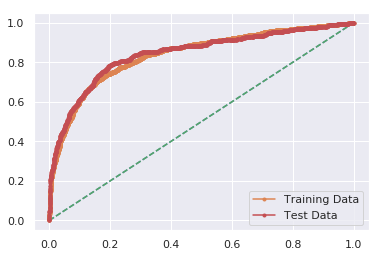

In [155]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 1.2 Logit with gridserach V2

In [156]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [157]:
model = LogisticRegression(max_iter=10000,n_jobs=2,random_state=123)

In [158]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [159]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=123, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [160]:
best_model = grid_search.best_estimator_

In [161]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [162]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6556
           1       0.70      0.35      0.47      1326

    accuracy                           0.87      7882
   macro avg       0.79      0.66      0.70      7882
weighted avg       0.85      0.87      0.85      7882



In [163]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2808
           1       0.73      0.40      0.52       570

    accuracy                           0.87      3378
   macro avg       0.81      0.68      0.72      3378
weighted avg       0.86      0.87      0.86      3378



AUC for the Training Data: 0.839
AUC for the Test Data: 0.844


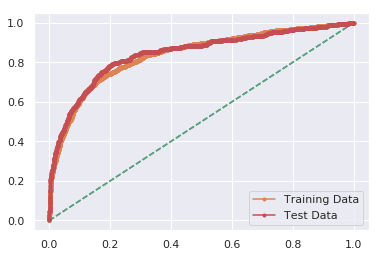

In [164]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 2.1 Random Forest V1

In [165]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [166]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=123)
rfcl = rfcl.fit(X_train, y_train)

In [167]:
rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [168]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [169]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6556
           1       0.92      0.86      0.89      1326

    accuracy                           0.97      7882
   macro avg       0.95      0.92      0.94      7882
weighted avg       0.96      0.97      0.96      7882



In [170]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2808
           1       0.81      0.73      0.77       570

    accuracy                           0.92      3378
   macro avg       0.88      0.85      0.86      3378
weighted avg       0.92      0.92      0.92      3378



AUC for the Training Data: 0.994
AUC for the Test Data: 0.943


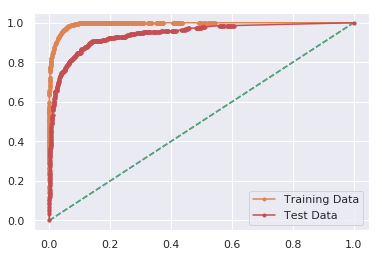

In [171]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = rfcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = rfcl.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [172]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by=["Imp"],ascending=False))


                         Imp
Tenure              0.377143
Payment             0.127168
Account_user_count  0.099534
Marital_Status      0.082568
Complain_ly         0.080476
Login_device        0.066399
Gender              0.059193
rev_per_month       0.055859
City_Tier           0.051660


### 2.2 RF with SMOTE

In [173]:
rf_smote = rfcl.fit(X_res, y_res)

In [174]:
rf_smote

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [175]:
pred_train_smote = rf_smote.predict(X_res)
pred_test_smote = rf_smote.predict(X_test)
pred_train_smote = rf_smote.predict(X_res)
pred_test_smote = rf_smote.predict(X_test)

In [176]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6556
           1       0.97      0.97      0.97      5244

    accuracy                           0.97     11800
   macro avg       0.97      0.97      0.97     11800
weighted avg       0.97      0.97      0.97     11800



In [177]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2808
           1       0.77      0.74      0.76       570

    accuracy                           0.92      3378
   macro avg       0.86      0.85      0.85      3378
weighted avg       0.92      0.92      0.92      3378



AUC for the Training Data: 0.998
AUC for the Test Data: 0.943


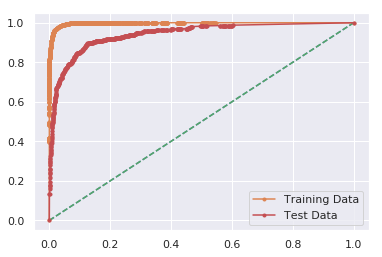

In [178]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = rf_smote.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = rf_smote.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [179]:
print (pd.DataFrame(rf_smote.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by=["Imp"],ascending=False))


                         Imp
Tenure              0.407195
Complain_ly         0.120589
Payment             0.103266
Account_user_count  0.091496
Marital_Status      0.082650
Login_device        0.057123
Gender              0.053033
rev_per_month       0.044289
City_Tier           0.040359


### 2.3 RF with Gridsearch V3

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8,9,10],
    'max_features': [3,4,5,6,7],
    'min_samples_leaf': [10,15,20, 25],
    'min_samples_split': [30,45,60, 75],
    'n_estimators': [51,101, 301]
}
rfcl = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [181]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [182]:
best_grid = grid_search.best_estimator_

In [183]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [184]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [185]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6556
           1       0.79      0.57      0.67      1326

    accuracy                           0.90      7882
   macro avg       0.86      0.77      0.80      7882
weighted avg       0.90      0.90      0.90      7882



In [186]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2808
           1       0.79      0.56      0.65       570

    accuracy                           0.90      3378
   macro avg       0.85      0.76      0.80      3378
weighted avg       0.89      0.90      0.89      3378



AUC for the Training Data: 0.942
AUC for the Test Data: 0.923


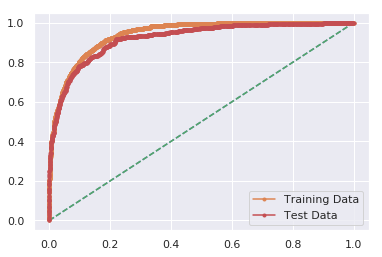

In [187]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [188]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by=["Imp"],ascending=False))


                         Imp
Tenure              0.549206
Complain_ly         0.132032
Marital_Status      0.074234
Payment             0.070380
Account_user_count  0.046197
rev_per_month       0.038082
City_Tier           0.037560
Gender              0.027698
Login_device        0.024611


### 3.1 LDA

In [189]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [190]:
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [191]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [192]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      6556
           1       0.67      0.35      0.46      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.66      0.69      7882
weighted avg       0.84      0.86      0.84      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2808
           1       0.68      0.39      0.50       570

    accuracy                           0.87      3378
   macro avg       0.78      0.68      0.71      3378
weighted avg       0.85      0.87      0.85      3378
 



In [193]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.836
AUC for the Test Data: 0.841


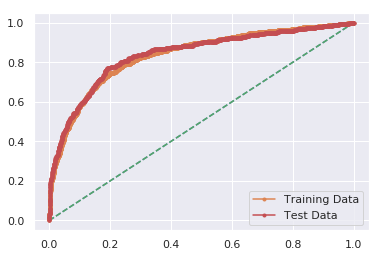

In [194]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1
Accuracy Score 0.6544
F1 Score 0.4567
Confusion Matrix


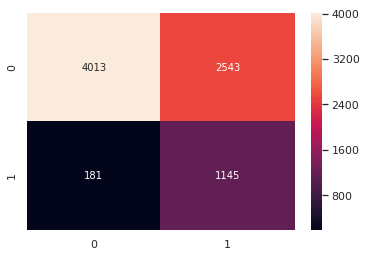

0.2
Accuracy Score 0.79
F1 Score 0.5442
Confusion Matrix


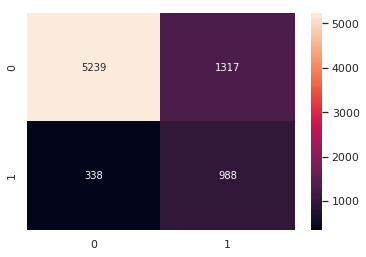

0.3
Accuracy Score 0.8356
F1 Score 0.5568
Confusion Matrix


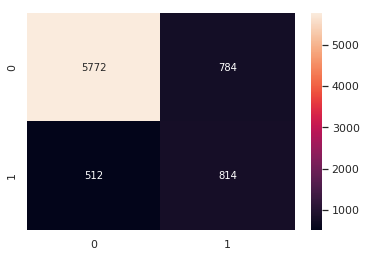

0.4
Accuracy Score 0.8571
F1 Score 0.5297
Confusion Matrix


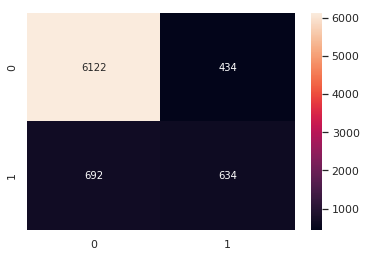

0.5
Accuracy Score 0.8615
F1 Score 0.4621
Confusion Matrix


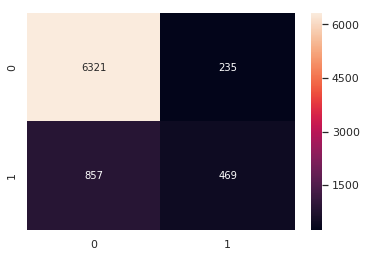

0.6
Accuracy Score 0.8623
F1 Score 0.3867
Confusion Matrix


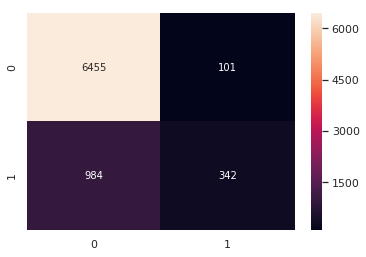

0.7
Accuracy Score 0.8573
F1 Score 0.2956
Confusion Matrix


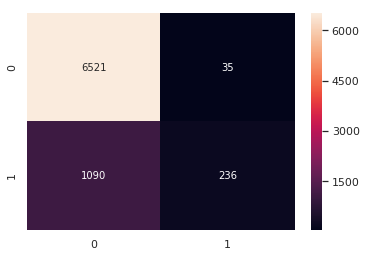

0.8
Accuracy Score 0.8409
F1 Score 0.1194
Confusion Matrix


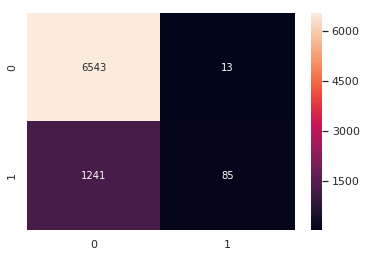

0.9
Accuracy Score 0.832
F1 Score 0.003
Confusion Matrix


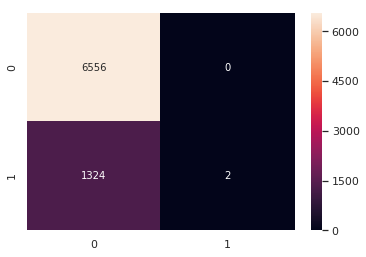

In [195]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3))
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4))
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g')
    plt.show();

In [196]:
grid={
      'solver':['sag','lbfgs','svd'],
      'tol':[0.01,0.0001,0.00001]}

In [197]:
model = LinearDiscriminantAnalysis()

In [198]:
grid_search = GridSearchCV(estimator = model, param_grid = grid)

In [199]:
grid_search.fit(X_train, y_train)

/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: unknown solver sag (valid solvers are 'svd', 'lsqr', and 'eigen').

  FitFailedWarning)
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: unknown solver sag (valid solvers are 'svd', 'lsqr', and 'eigen').

  FitFailedWarning)
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: unknown solver sag (valid solvers are 'svd', 'lsqr', and 'eigen').

  FitFailedWarning)
/home/pothangaraj/.

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['sag', 'lbfgs', 'svd'],
                         'tol': [0.01, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [200]:
best_model = grid_search.best_estimator_

In [201]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.01)

In [202]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [203]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6556
           1       0.67      0.35      0.46      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.66      0.69      7882
weighted avg       0.84      0.86      0.84      7882



In [204]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2808
           1       0.68      0.39      0.50       570

    accuracy                           0.87      3378
   macro avg       0.78      0.68      0.71      3378
weighted avg       0.85      0.87      0.85      3378



AUC for the Training Data: 0.836
AUC for the Test Data: 0.841


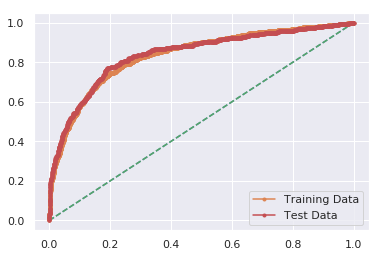

In [205]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 4.1 Naiive Bayes

In [206]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [207]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [208]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8617102258310073
[[6299  257]
 [ 833  493]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6556
           1       0.66      0.37      0.47      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.67      0.70      7882
weighted avg       0.85      0.86      0.85      7882



In [209]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8670811130846655
[[2689  119]
 [ 330  240]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2808
           1       0.67      0.42      0.52       570

    accuracy                           0.87      3378
   macro avg       0.78      0.69      0.72      3378
weighted avg       0.85      0.87      0.85      3378



AUC for the Training Data: 0.835
AUC for the Test Data: 0.838


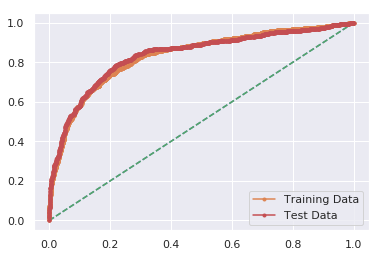

In [210]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

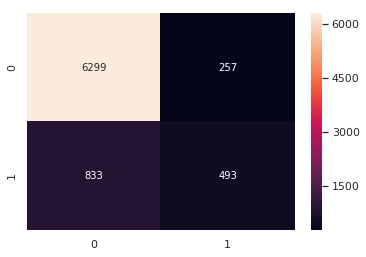

In [211]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

cf_matrix=confusion_matrix(y_train, y_train_predict)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,fmt='g')

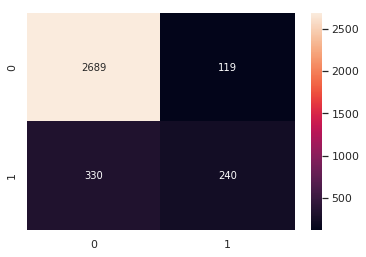

In [212]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

cf_matrix=confusion_matrix(y_test, y_test_predict)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,fmt='g')

### 4.2 NAIIVE BAYES

In [213]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [214]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_res, y_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [215]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_res)
model_score = NB_SM_model.score(X_res, y_res)
print(model_score)
print(metrics.confusion_matrix(y_res, y_train_predict))
print(metrics.classification_report(y_res ,y_train_predict))

0.7763559322033898
[[5182 1374]
 [1265 3979]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      6556
           1       0.74      0.76      0.75      5244

    accuracy                           0.78     11800
   macro avg       0.77      0.77      0.77     11800
weighted avg       0.78      0.78      0.78     11800



In [216]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7901124925991712
[[2233  575]
 [ 134  436]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2808
           1       0.43      0.76      0.55       570

    accuracy                           0.79      3378
   macro avg       0.69      0.78      0.71      3378
weighted avg       0.86      0.79      0.81      3378



AUC for the Training Data: 0.839
AUC for the Test Data: 0.836


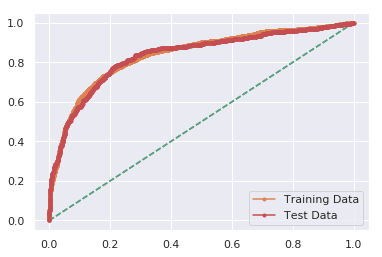

In [217]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = NB_SM_model.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = NB_SM_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 5.1 KNN with default parameter v1

In [218]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [219]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)


In [220]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=10)

In [221]:
X_train_scaled.shape

(7882, 17)

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [223]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_scaled)
model_score = KNN_model.score(X_train_scaled, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9647297640192845
[[6504   69]
 [ 209 1100]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6573
           1       0.94      0.84      0.89      1309

    accuracy                           0.96      7882
   macro avg       0.95      0.91      0.93      7882
weighted avg       0.96      0.96      0.96      7882



In [224]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_scaled)
model_score = KNN_model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9197750148016578
[[2716   75]
 [ 196  391]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2791
           1       0.84      0.67      0.74       587

    accuracy                           0.92      3378
   macro avg       0.89      0.82      0.85      3378
weighted avg       0.92      0.92      0.92      3378



AUC for the Training Data: 0.991
AUC for the Test Data: 0.946


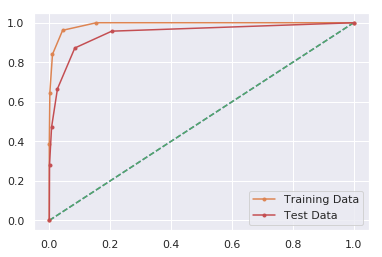

In [225]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train_scaled)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test_scaled)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

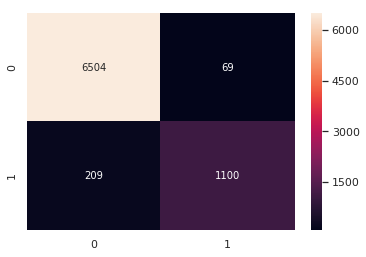

In [226]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

cf_matrix=confusion_matrix(y_train, y_train_predict)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,fmt='g')

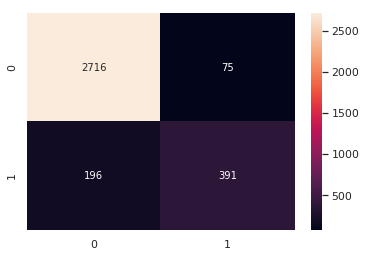

In [227]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

cf_matrix=confusion_matrix(y_test, y_test_predict)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,fmt='g')

### 5.2 Finding best K

In [228]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.05447010065127289,
 0.06956779159265836,
 0.0802249851983422,
 0.08525754884547065,
 0.0941385435168739,
 0.1033155713439905,
 0.10479573712255774,
 0.10834813499111906,
 0.11426879810538781,
 0.11574896388395506]

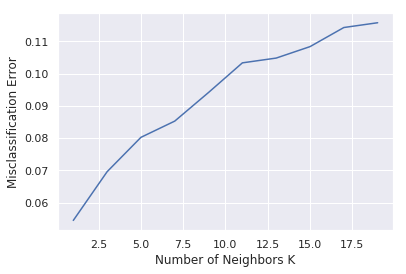

In [229]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 5.3 KNN with best K

In [230]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [231]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_scaled)
model_score = KNN_model.score(X_train_scaled, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9772900279116975
[[6509   64]
 [ 115 1194]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6573
           1       0.95      0.91      0.93      1309

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882



In [232]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_scaled)
model_score = KNN_model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9304322084073416
[[2701   90]
 [ 145  442]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2791
           1       0.83      0.75      0.79       587

    accuracy                           0.93      3378
   macro avg       0.89      0.86      0.87      3378
weighted avg       0.93      0.93      0.93      3378



## BOOSTING

### 6.1 Ada Boosting

In [233]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [234]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8339253996447602
[[6573    0]
 [1309    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6573
           1       0.00      0.00      0.00      1309

    accuracy                           0.83      7882
   macro avg       0.42      0.50      0.45      7882
weighted avg       0.70      0.83      0.76      7882



/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8262285375962107
[[2791    0]
 [ 587    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2791
           1       0.00      0.00      0.00       587

    accuracy                           0.83      3378
   macro avg       0.41      0.50      0.45      3378
weighted avg       0.68      0.83      0.75      3378



/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC for the Training Data: 0.541
AUC for the Test Data: 0.500


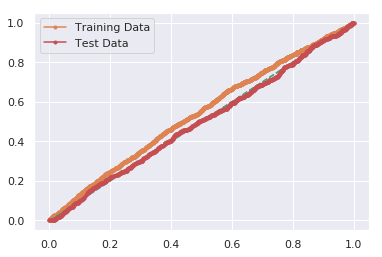

In [236]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Adoptive Boosting with SMOTE

In [237]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_res,y_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [238]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_res)
model_score = ADB_model.score(X_res, y_res)
print(model_score)
print(metrics.confusion_matrix(y_res, y_train_predict))
print(metrics.classification_report(y_res, y_train_predict))

0.878135593220339
[[5899  657]
 [ 781 4463]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6556
           1       0.87      0.85      0.86      5244

    accuracy                           0.88     11800
   macro avg       0.88      0.88      0.88     11800
weighted avg       0.88      0.88      0.88     11800



In [239]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test_res)
model_score = ADB_model.score(X_test_res, y_test_res)
print(model_score)
print(metrics.confusion_matrix(y_test_res, y_test_predict))
print(metrics.classification_report(y_test_res, y_test_predict))

0.889196675900277
[[2541  267]
 [ 293 1953]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2808
           1       0.88      0.87      0.87      2246

    accuracy                           0.89      5054
   macro avg       0.89      0.89      0.89      5054
weighted avg       0.89      0.89      0.89      5054



AUC for the Training Data: 0.943
AUC for the Test Data: 0.949


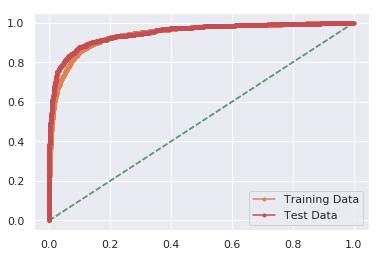

In [240]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test_res)

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test_res,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_res,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 7 Grdient Boosting

In [241]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [242]:
gbcl

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [243]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341791423496574
[[6573    0]
 [1307    2]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6573
           1       1.00      0.00      0.00      1309

    accuracy                           0.83      7882
   macro avg       0.92      0.50      0.46      7882
weighted avg       0.86      0.83      0.76      7882



In [244]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8262285375962107
[[2791    0]
 [ 587    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2791
           1       0.00      0.00      0.00       587

    accuracy                           0.83      3378
   macro avg       0.41      0.50      0.45      3378
weighted avg       0.68      0.83      0.75      3378



/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pothangaraj/.local/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC for the Training Data: 0.623
AUC for the Test Data: 0.496


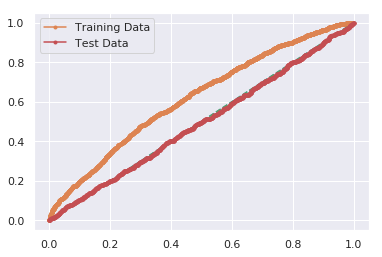

In [245]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Gradient boosting with SMOTE

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_res, y_res)

In [247]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_res)
model_score = gbcl.score(X_res, y_res)
print(model_score)
print(metrics.confusion_matrix(y_res, y_train_predict))
print(metrics.classification_report(y_res, y_train_predict))

0.8961864406779662
[[5985  571]
 [ 654 4590]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6556
           1       0.89      0.88      0.88      5244

    accuracy                           0.90     11800
   macro avg       0.90      0.89      0.89     11800
weighted avg       0.90      0.90      0.90     11800



In [248]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test_res)
model_score = gbcl.score(X_test_res, y_test_res)
print(model_score)
print(metrics.confusion_matrix(y_test_res, y_test_predict))
print(metrics.classification_report(y_test_res, y_test_predict))

0.9010684606252474
[[2583  225]
 [ 275 1971]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2808
           1       0.90      0.88      0.89      2246

    accuracy                           0.90      5054
   macro avg       0.90      0.90      0.90      5054
weighted avg       0.90      0.90      0.90      5054



AUC for the Training Data: 0.957
AUC for the Test Data: 0.957


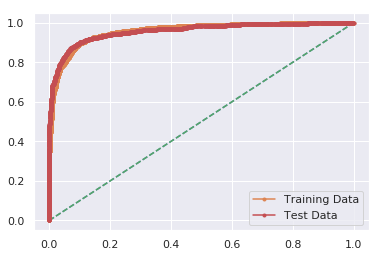

In [249]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test_res)

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test_res,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_res,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 8.1 Bagging

In [250]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cart = DecisionTreeClassifier()
RF=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [251]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8672925653387465
[[6521   52]
 [ 994  315]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6573
           1       0.86      0.24      0.38      1309

    accuracy                           0.87      7882
   macro avg       0.86      0.62      0.65      7882
weighted avg       0.87      0.87      0.83      7882



In [252]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8058022498519835
[[2705   86]
 [ 570   17]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2791
           1       0.17      0.03      0.05       587

    accuracy                           0.81      3378
   macro avg       0.50      0.50      0.47      3378
weighted avg       0.71      0.81      0.75      3378



AUC for the Training Data: 0.922
AUC for the Test Data: 0.515


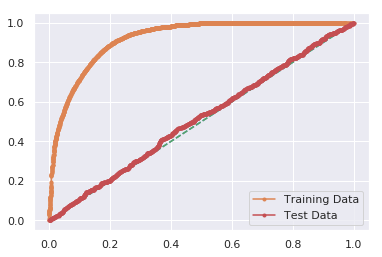

In [253]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Bagging with SMOTE

In [254]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cart = DecisionTreeClassifier()
RF=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_res, y_res)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [255]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_res)
model_score =Bagging_model.score(X_res, y_res)
print(model_score)
print(metrics.confusion_matrix(y_res, y_train_predict))
print(metrics.classification_report(y_res, y_train_predict))

0.9708474576271187
[[6391  165]
 [ 179 5065]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6556
           1       0.97      0.97      0.97      5244

    accuracy                           0.97     11800
   macro avg       0.97      0.97      0.97     11800
weighted avg       0.97      0.97      0.97     11800



In [256]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test_res)
model_score = Bagging_model.score(X_test_res, y_test_res)
print(model_score)
print(metrics.confusion_matrix(y_test_res, y_test_predict))
print(metrics.classification_report(y_test_res, y_test_predict))

0.9212504946576969
[[2681  127]
 [ 271 1975]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2808
           1       0.94      0.88      0.91      2246

    accuracy                           0.92      5054
   macro avg       0.92      0.92      0.92      5054
weighted avg       0.92      0.92      0.92      5054



AUC for the Training Data: 0.996
AUC for the Test Data: 0.975


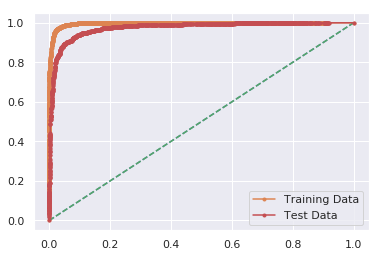

In [257]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test_res)

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test_res,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_res,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Cross Validation on Naive Bayes Model

In [258]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_res, y_res, cv=10)
scores

array([0.76864407, 0.7559322 , 0.76016949, 0.77288136, 0.76864407,
       0.80084746, 0.77457627, 0.77711864, 0.7940678 , 0.78135593])

In [259]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.82840237, 0.82544379, 0.82544379, 0.82544379, 0.82544379,
       0.82544379, 0.82544379, 0.82544379, 0.82789318, 0.82789318])